# Pace: Plan

This project is based on the method of **PACE** analysis which is:
- **P** Prepare
- **A** Analyze
- **C** Construct
- **E** Execute

*I would be practicing PACE Strategy to reflect on the analysis stages.*
  
 # Business scenario and problem
 The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data
 from employees, but now they don’t know what to do with it.

 They want data-driven suggestions based on your understanding of the data for which the question they have is:
 - ***What’s likely to make the employee leave the company?***

**What I would be doing:**
- Analyze the data collected by the HR department
- Build a model that predicts whether or not an employee will leave the company.

**What will it do for Salifort:**
- Predicting employees likely to quit,
- Identifying factors that contribute to their leaving.
- Prediction will save company's **Time, Cost and Resources** to hire a new employee.
- Employee retention will be increased.

# Starting Analysis with **PACE** Strategy
**P**ace: Prepare

# Step 1: 

**Importing packages::**

In [1]:
# Importing core packages

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)

# Save models
import pickle

**Loading dataset:**

In [2]:
# Load the dataset
df = pd.read_csv("HR_capstone_dataset.csv")

# Preview the dataset
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# Step 2. 

**Data Exploration (Initial EDA and data cleaning)**
 - Understanding variables
 - Cleaning dataset (missing data, redundant data, outliers)


**Gathering basic information about data:**

In [3]:
# View the shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (14999, 10)


In [4]:
# Check data types
print("Data Types:\n")
print(df.dtypes)

Data Types:

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [5]:
# Check for missing values
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [6]:
# Preview the first few rows
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

**Gathering descriptive statistics about the data:**

In [7]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

**Renaming columns:**

In [9]:
# Rename columns for consistency and clarity
df = df.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Department': 'department'
})

# Display updated column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

**Checking missing values"**

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


**Checking duplicates:**

In [11]:
df.duplicated().sum()

np.int64(3008)

In [12]:
df[df.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate
 entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?
 You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each
 column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations
 are legitimate. You can proceed by dropping them.

**Dropping duplicates:**

In [13]:
# Create a cleaned version of the original DataFrame
df1 = df.drop_duplicates(keep='first')
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

**Detecting Outliers:**

In [14]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Detect outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

satisfaction_level: 0 outliers
last_evaluation: 0 outliers
number_project: 0 outliers
average_monthly_hours: 0 outliers
tenure: 1282 outliers
work_accident: 2169 outliers
left: 3571 outliers
promotion_last_5years: 319 outliers


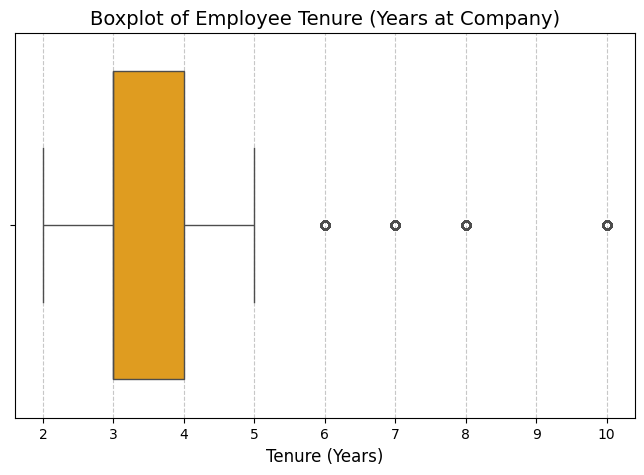

In [15]:
# Boxplot for 'tenure' to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tenure'], color='orange')
plt.title('Boxplot of Employee Tenure (Years at Company)', fontsize=14)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Detect outliers in 'tenure' using the IQR method

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)

# Step 2: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define outlier boundaries
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 4: Identify and count outliers
outliers = df[(df['tenure'] < lower_limit) | (df['tenure'] > upper_limit)]

# Step 5: Output results
print(f"Lower limit for 'tenure': {lower_limit}")
print(f"Upper limit for 'tenure': {upper_limit}")
print(f"Number of outlier rows in 'tenure': {outliers.shape[0]}")

Lower limit for 'tenure': 1.5
Upper limit for 'tenure': 5.5
Number of outlier rows in 'tenure': 1282


**Familiarizing with the HR dataset:**

| **Variable**            | **Description**                                                   |
| ----------------------- | ----------------------------------------------------------------- |
| `satisfaction_level`    | Employee-reported job satisfaction level $0–1$                    |
| `last_evaluation`       | Score of employee's last performance review $0–1$                 |
| `number_project`        | Number of projects employee contributes to                        |
| `average_monthly_hours` | Average number of hours employee worked per month                 |
| `time_spend_company`    | How long the employee has been with the company (years)           |
| `Work_accident`         | Whether or not the employee experienced an accident while at work |
| `left`                  | Whether or not the employee left the company                      |
| `promotion_last_5years` | Whether or not the employee was promoted in the last 5 years      |
| `Department`            | The employee's department                                         |
| `salary`                | The employee's salary (U.S. dollars)                              |


### **Reflecting questions as completed PLAN stage**
---

**1. Who are your stakeholders for this project?**
HR managers, company leadership, and employee engagement teams.

**2. What are you trying to solve or accomplish?**
Identify key factors influencing employee attrition and build predictive models to support employee retention strategies.

**3. What are your initial observations when you explore the data?**
Employees with high workloads, low satisfaction, and high evaluation scores were more likely to leave.

**4. What resources do you find yourself using as you complete this stage?**
Python (Pandas, Matplotlib, Seaborn), Scikit-learn, documentation, HR dataset.

**5. Do you have any ethical considerations in this stage?**
Yes—ensuring data privacy, avoiding biased conclusions, and using predictions responsibly to support, not penalize, employees.

# Next:
p**A**ce: Analyze Stage:
- Performing EDA to analyze relationships between variables

# Data Exploration (Continuing EDA)
Begining by understanding:
 - How many employees left.
 - What percentage of all employees this figure represents.

In [17]:
# Count how many employees left the company
left_count = df1['left'].value_counts()[1]

# Calculate total number of employees
total_employees = len(df1)

# Calculate percentage of employees who left
left_percentage = (left_count / total_employees) * 100

# Display results
print(f"Employees who left: {left_count}")
print(f"Total employees: {total_employees}")
print(f"Percentage who left: {left_percentage:.2f}%")

Employees who left: 1991
Total employees: 11991
Percentage who left: 16.60%


In [18]:
# ✅ Count of Employees Who Left vs Stayed

# Raw counts
left_counts = df['left'].value_counts()
print(left_counts)

# Normalized proportions
left_proportions = df['left'].value_counts(normalize=True)
print(left_proportions)

left
0    11428
1     3571
Name: count, dtype: int64
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


In [19]:
# 📊 Attrition by Department

# Group by department and 'left' status, then count
dept_attrition = df1.groupby(['department', 'left']).size().unstack()

# Fill NaNs with 0 and convert to integers
dept_attrition = dept_attrition.fillna(0).astype(int)

# Add a percentage column for attrition
dept_attrition['Attrition %'] = (dept_attrition[1] / (dept_attrition[0] + dept_attrition[1])) * 100

# Display the table
print(dept_attrition.sort_values(by='Attrition %', ascending=False))

left            0    1  Attrition %
department                         
hr            488  113    18.801997
accounting    512  109    17.552335
technical    1854  390    17.379679
support      1509  312    17.133443
sales        2689  550    16.980550
marketing     561  112    16.641902
IT            818  158    16.188525
product_mng   576  110    16.034985
RandD         609   85    12.247839
management    384   52    11.926606


**Visualizing Data:**

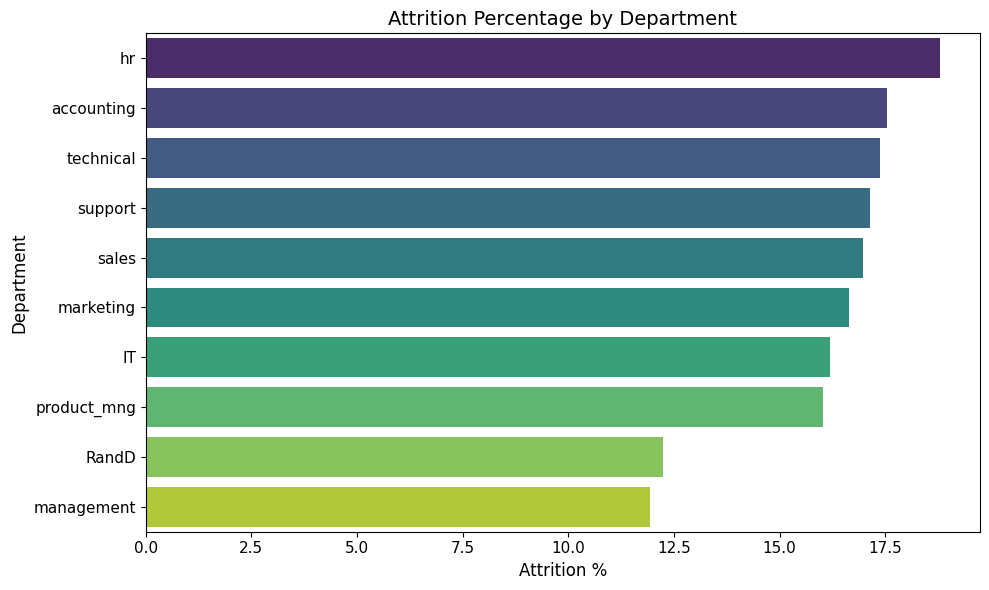

In [20]:
# ✅ Updated Bar Plot: Attrition % by Department

plt.figure(figsize=(10,6))
plt.title('Attrition Percentage by Department', fontsize=14)

# Add hue (same as 'department') and turn off the legend
sns.barplot(
    data=dept_attrition.sort_values(by='Attrition %', ascending=False).reset_index(),
    x='Attrition %',
    y='department',
    hue='department',
    palette='viridis',
    legend=False
)

plt.xlabel('Attrition %', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

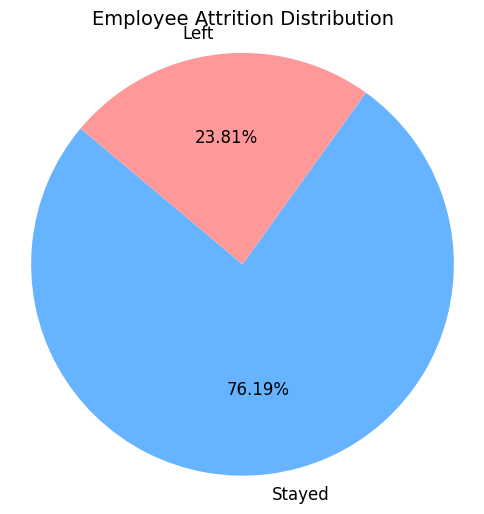

In [21]:
# 📊 Pie Chart – Employee Attrition Overview

# Count of employees who left vs stayed
left_counts = df['left'].value_counts()
labels = ['Stayed', 'Left']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.title('Employee Attrition Distribution', fontsize=14)
plt.pie(left_counts, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

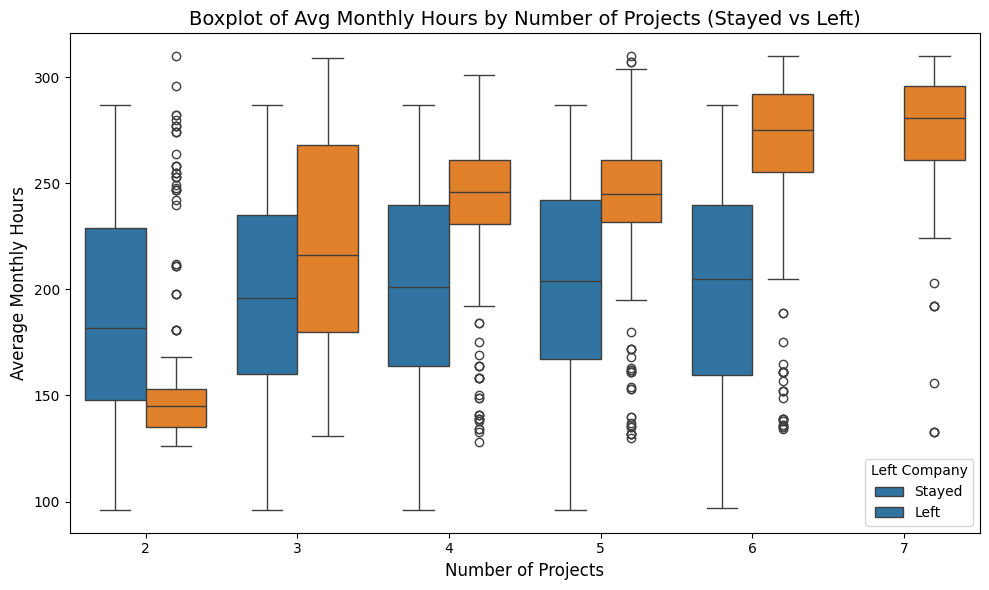

In [22]:
# Boxplot: average_monthly_hours by number_project, comparing who left vs who stayed
plt.figure(figsize=(10, 6))
plt.title('Boxplot of Avg Monthly Hours by Number of Projects (Stayed vs Left)', fontsize=14)
sns.boxplot(x='number_project', y='average_monthly_hours', hue='left', data=df)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

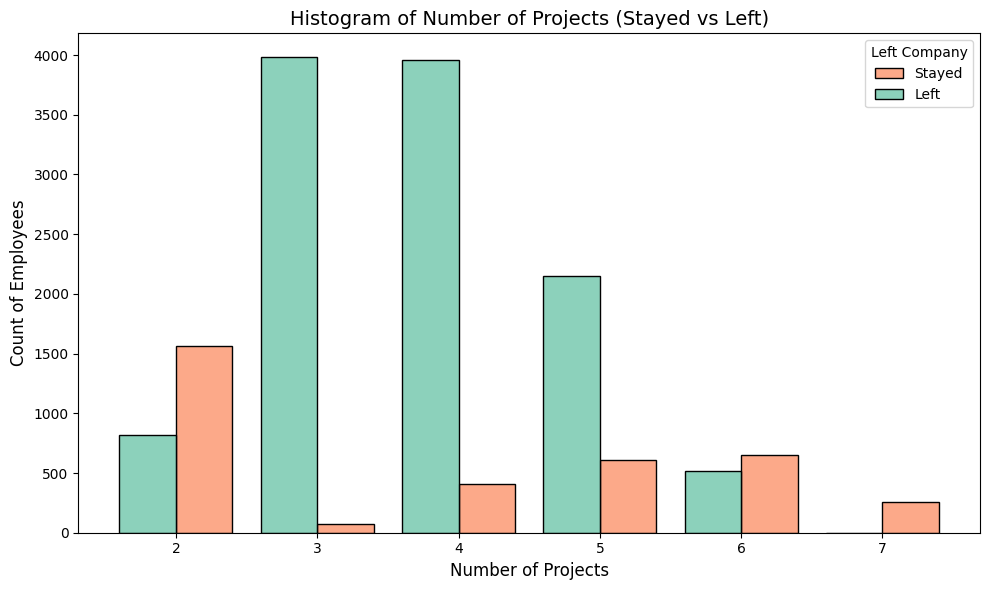

In [23]:
# Histogram: number_project distribution, comparing who left vs stayed
plt.figure(figsize=(10, 6))
plt.title('Histogram of Number of Projects (Stayed vs Left)', fontsize=14)
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=0.8, palette='Set2', discrete=True)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

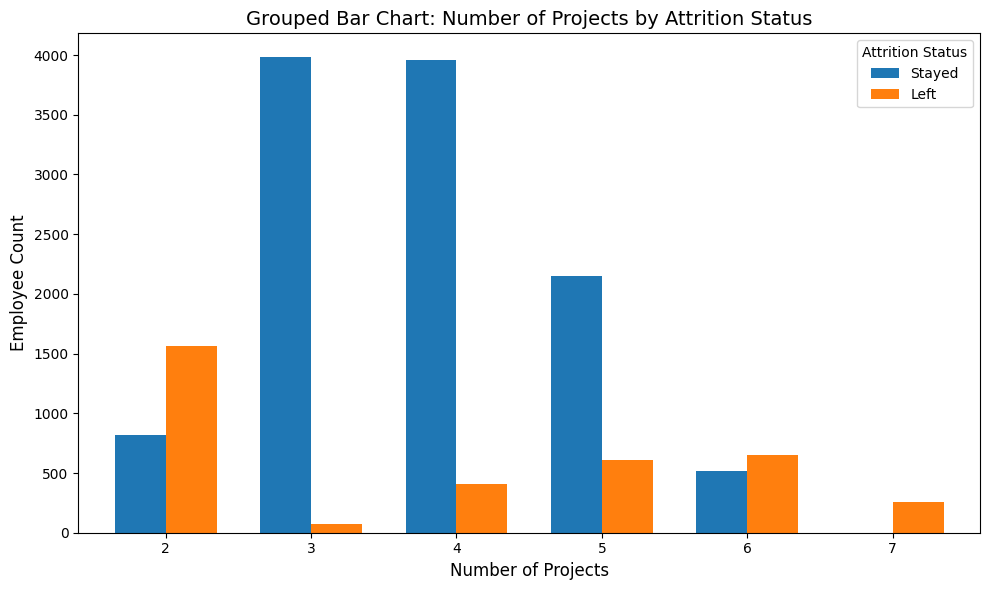

In [24]:
# Grouped Bar Chart: Number of Projects by Attrition Status (Stayed vs Left)
project_counts = df.groupby(['number_project', 'left']).size().unstack().fillna(0)
project_counts.columns = ['Stayed', 'Left']

# Plot
project_counts.plot(kind='bar', figsize=(10, 6), width=0.7)
plt.title('Grouped Bar Chart: Number of Projects by Attrition Status', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.legend(title='Attrition Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

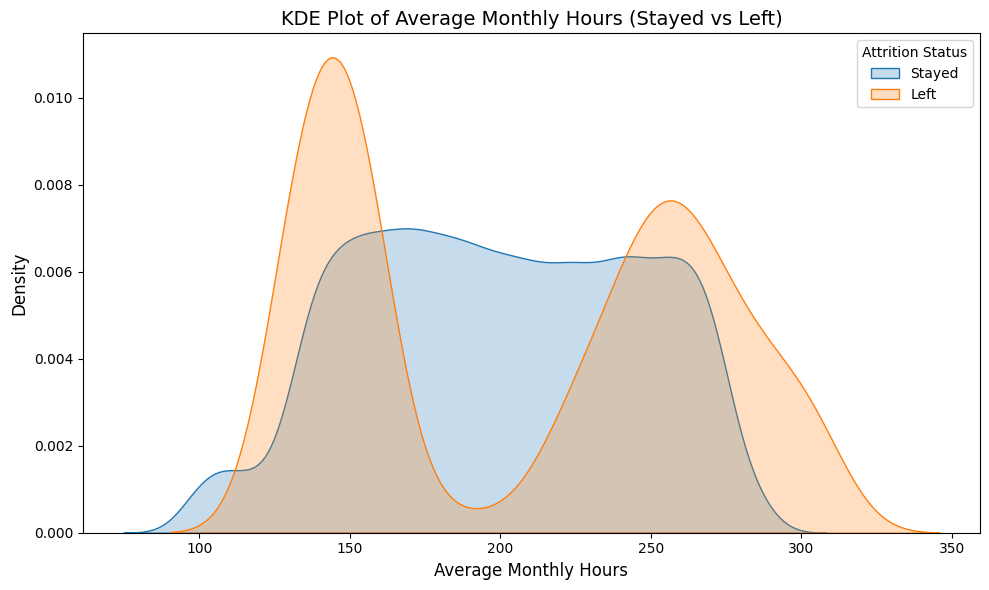

In [25]:
# KDE Plot: Distribution of average monthly hours (stayed vs left)
plt.figure(figsize=(10, 6))
plt.title('KDE Plot of Average Monthly Hours (Stayed vs Left)', fontsize=14)

sns.kdeplot(data=df[df['left'] == 0], x='average_monthly_hours', fill=True, label='Stayed')
sns.kdeplot(data=df[df['left'] == 1], x='average_monthly_hours', fill=True, label='Left')

plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Attrition Status')
plt.tight_layout()
plt.show()

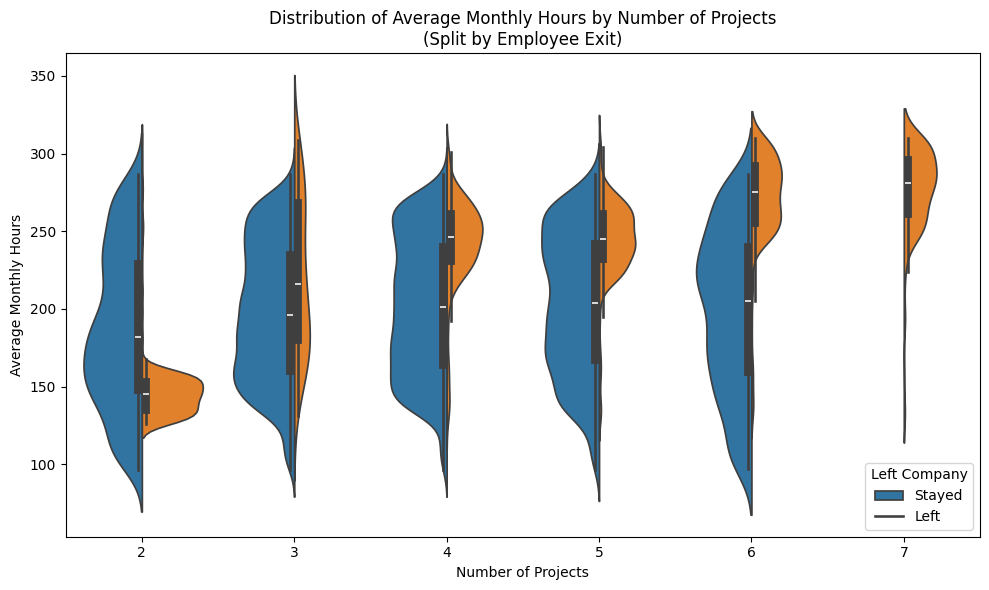

In [26]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='number_project', y='average_monthly_hours', hue='left', split=True)
plt.title('Distribution of Average Monthly Hours by Number of Projects\n(Split by Employee Exit)')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

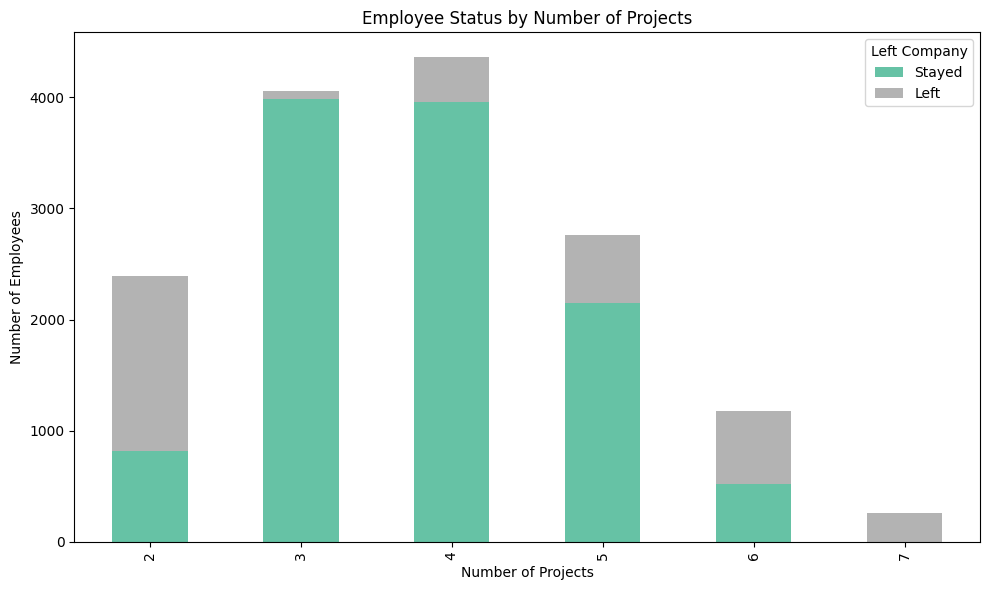

In [27]:
#Stacked bar chart
project_left_counts = df.groupby(['number_project', 'left']).size().unstack(fill_value=0)

project_left_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Employee Status by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

Analyzing trends found in different visualizations is that it might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from visualizations.

**1**. There are two groups of employees who left the company:

**(A)** those who worked considerably less than their peers with the same number of projects.

**(B)** those who worked much more.

**Possible Reasons:**

Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door.

For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

**2**. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295
 hours/month—much more than any other group.

**4**. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

**5**. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of
 employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month . This means that,
 aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more
 hours than this. It seems that employees here are overworked.
 
 **Let's do more analysis to confirm about employees with seven projects:**

In [28]:
# Filter and count
seven_project_counts = df[df['number_project'] == 7]['left'].value_counts()
print("🧮 Employee Status Counts for Those with 7 Projects:\n")
print(seven_project_counts.rename(index={0: 'Stayed', 1: 'Left'}))

🧮 Employee Status Counts for Those with 7 Projects:

left
Left    256
Name: count, dtype: int64


- This confirms that all employees with 7 projects did leave.
    
 
 **Let's examine the average monthly hours versus the satisfaction levels:**

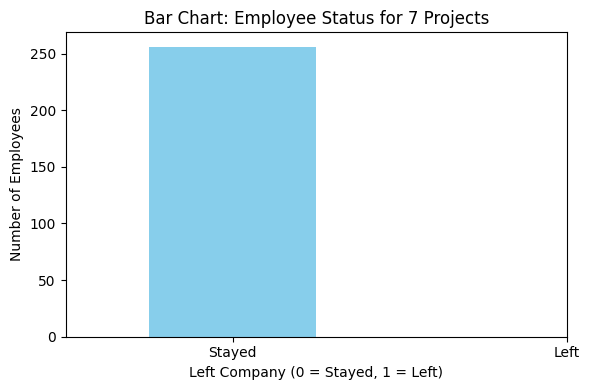

In [29]:
# Optional: Bar chart
seven_project_counts.plot(kind='bar', figsize=(6, 4), color=['skyblue', 'salmon'])
plt.title('Bar Chart: Employee Status for 7 Projects')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.tight_layout()
plt.show()

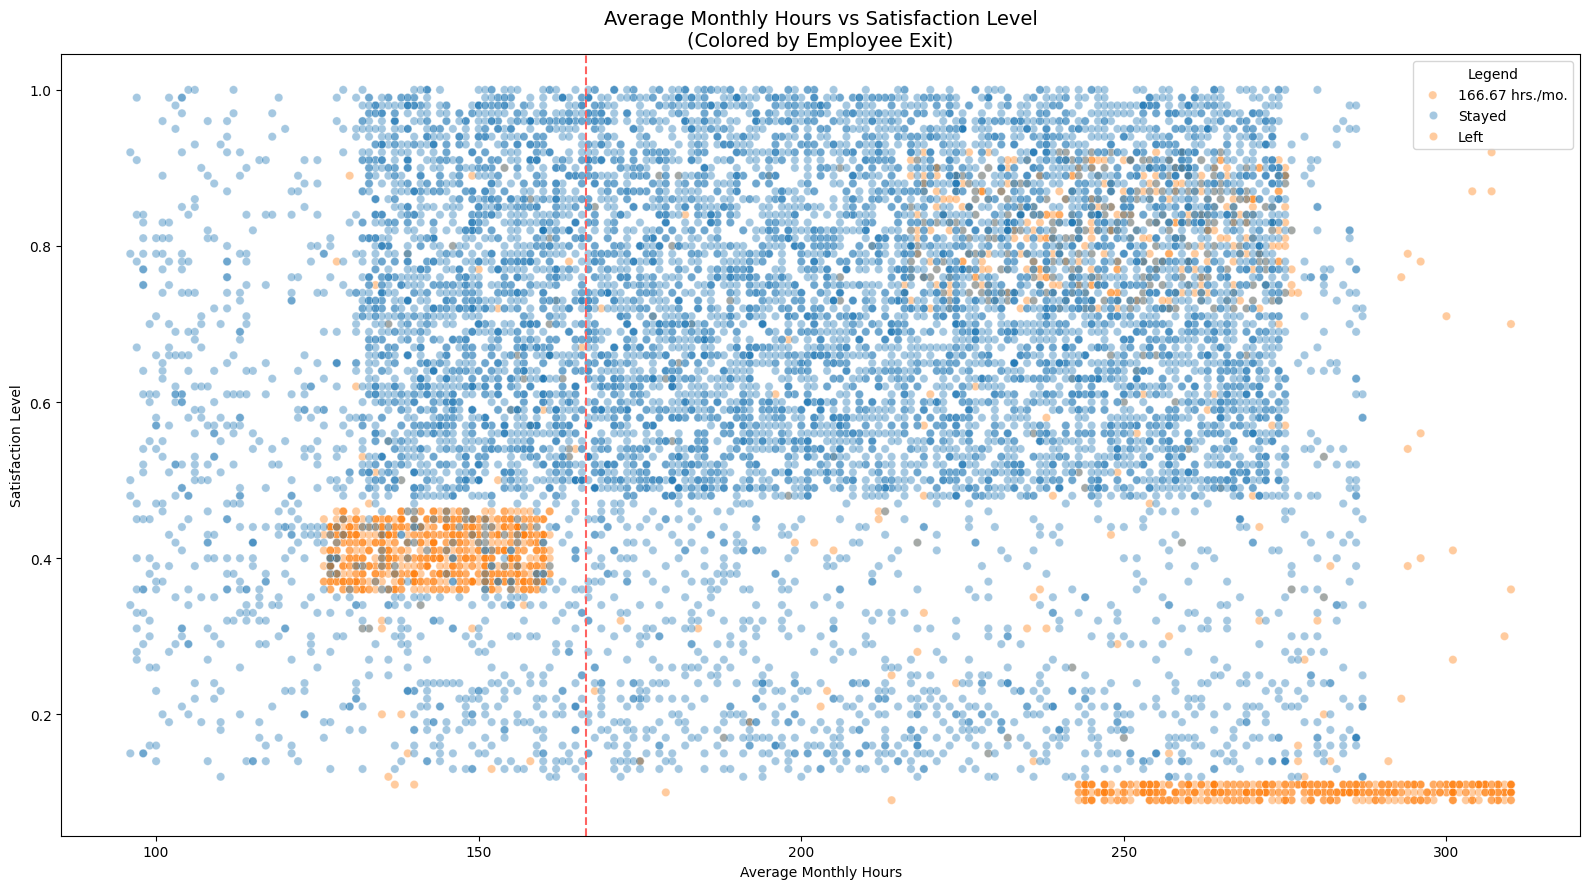

In [30]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

# Add vertical line at 166.67 hours
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', linestyle='--')

# Adjust legend to match labels
plt.legend(labels=['166.67 hrs./mo.', 'Stayed', 'Left'], title='Legend')

# Add title
plt.title('Average Monthly Hours vs Satisfaction Level\n(Colored by Employee Exit)', fontsize=14)

# Add axis labels
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

plt.tight_layout()
plt.show()

**Findings**

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over
 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.
 The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4.
 It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked
 more. And that pressure could have lowered their satisfaction levels.
 Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.
 
 Further
 
 The strange shape of the distributions here is indicative of data manipulation or synthetic data.

**Next**

- Tenure looks another interesting metric to be visualized, it might be interesting to visualize satisfaction levels by tenure.

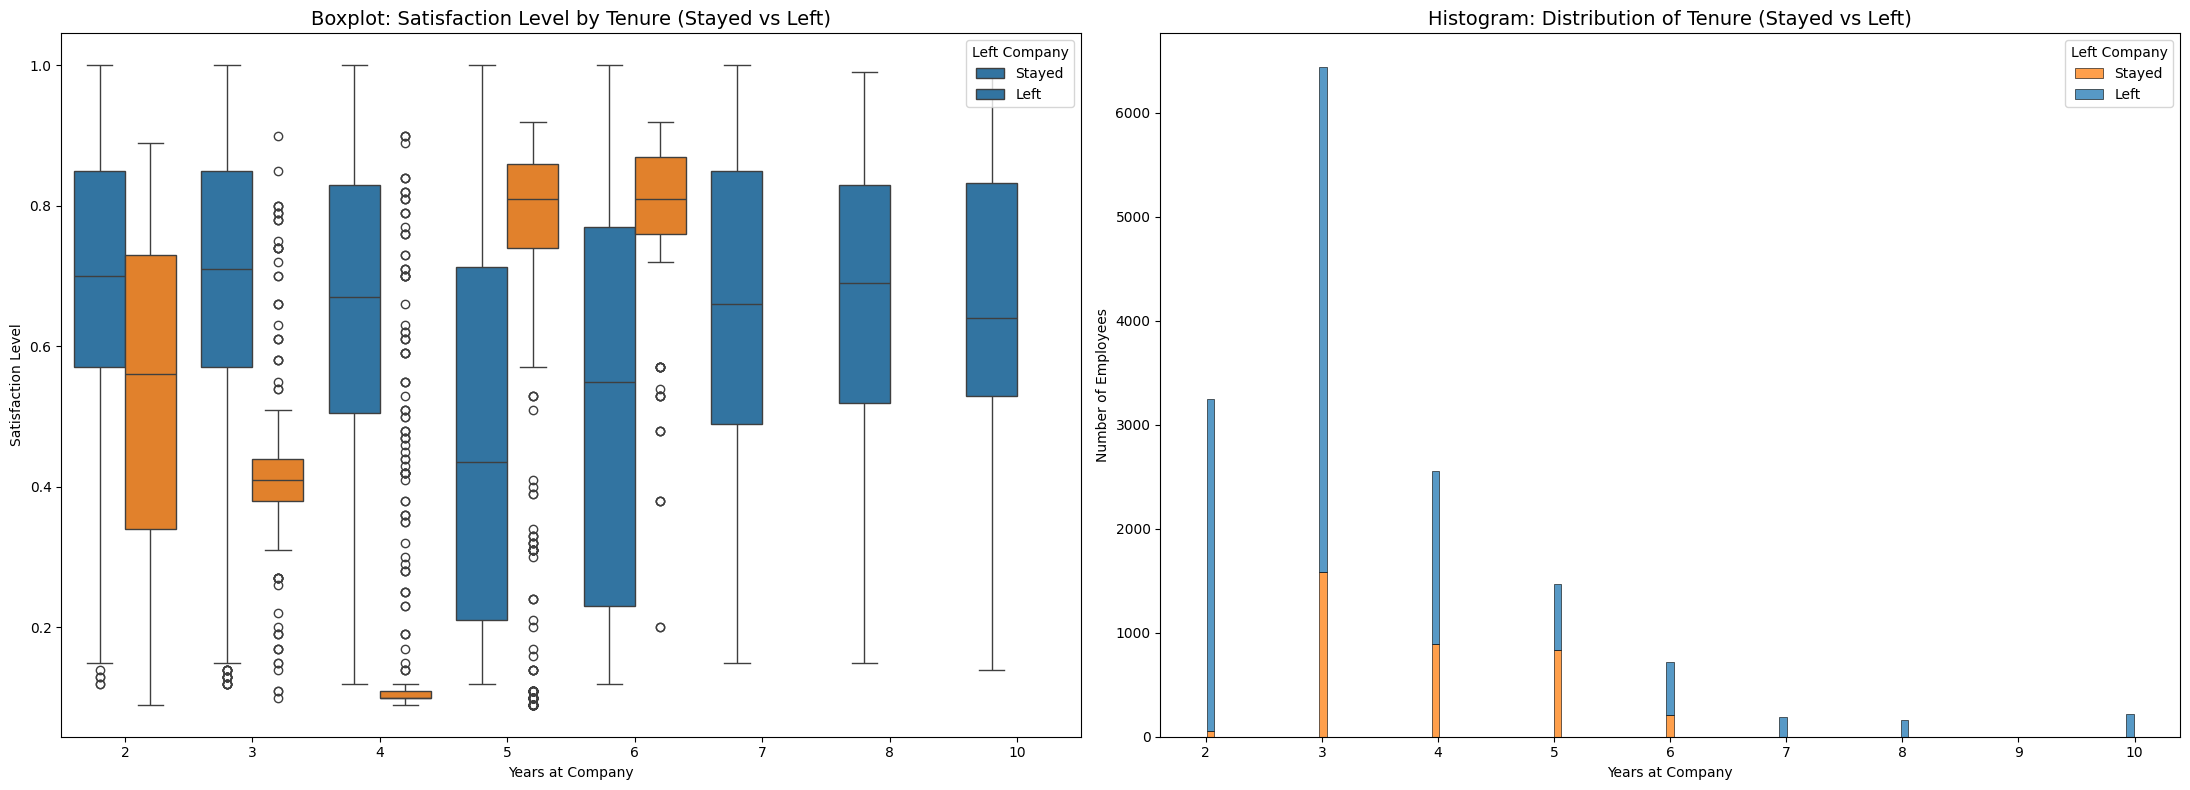

In [31]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot: Satisfaction Level by Tenure (Stayed vs Left)
sns.boxplot(data=df, x='tenure', y='satisfaction_level', hue='left', ax=ax[0])
ax[0].set_title('Boxplot: Satisfaction Level by Tenure (Stayed vs Left)', fontsize=14)
ax[0].set_xlabel('Years at Company')
ax[0].set_ylabel('Satisfaction Level')
ax[0].legend(title='Left Company', labels=['Stayed', 'Left'])

# Histogram: Distribution of Tenure (Stayed vs Left)
sns.histplot(data=df, x='tenure', hue='left', multiple='stack', shrink=0.8, ax=ax[1])
ax[1].set_title('Histogram: Distribution of Tenure (Stayed vs Left)', fontsize=14)
ax[1].set_xlabel('Years at Company')
ax[1].set_ylabel('Number of Employees')
ax[1].legend(title='Left Company', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

This visualization is giving many observations, like:
 - Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium
length tenures.
 - Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might
  have affected people specifically at the four-year mark, if possible.
 - The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
 -  The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid
 employees.

**Let's now calculate the mean and median satisfaction scores of employees who left and those who didn't:**

In [32]:
# Group by 'left' and calculate mean and median satisfaction levels
satisfaction_stats = df.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

# Rename index for readability
satisfaction_stats.index = ['Stayed', 'Left']

print("📊 Mean & Median Satisfaction Scores:\n")
print(satisfaction_stats)

📊 Mean & Median Satisfaction Scores:

            mean  median
Stayed  0.666810    0.69
Left    0.440098    0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among
 employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among
 those who stayed might be skewed to the left.

**Let's now examine the salary levels for different tenures:**

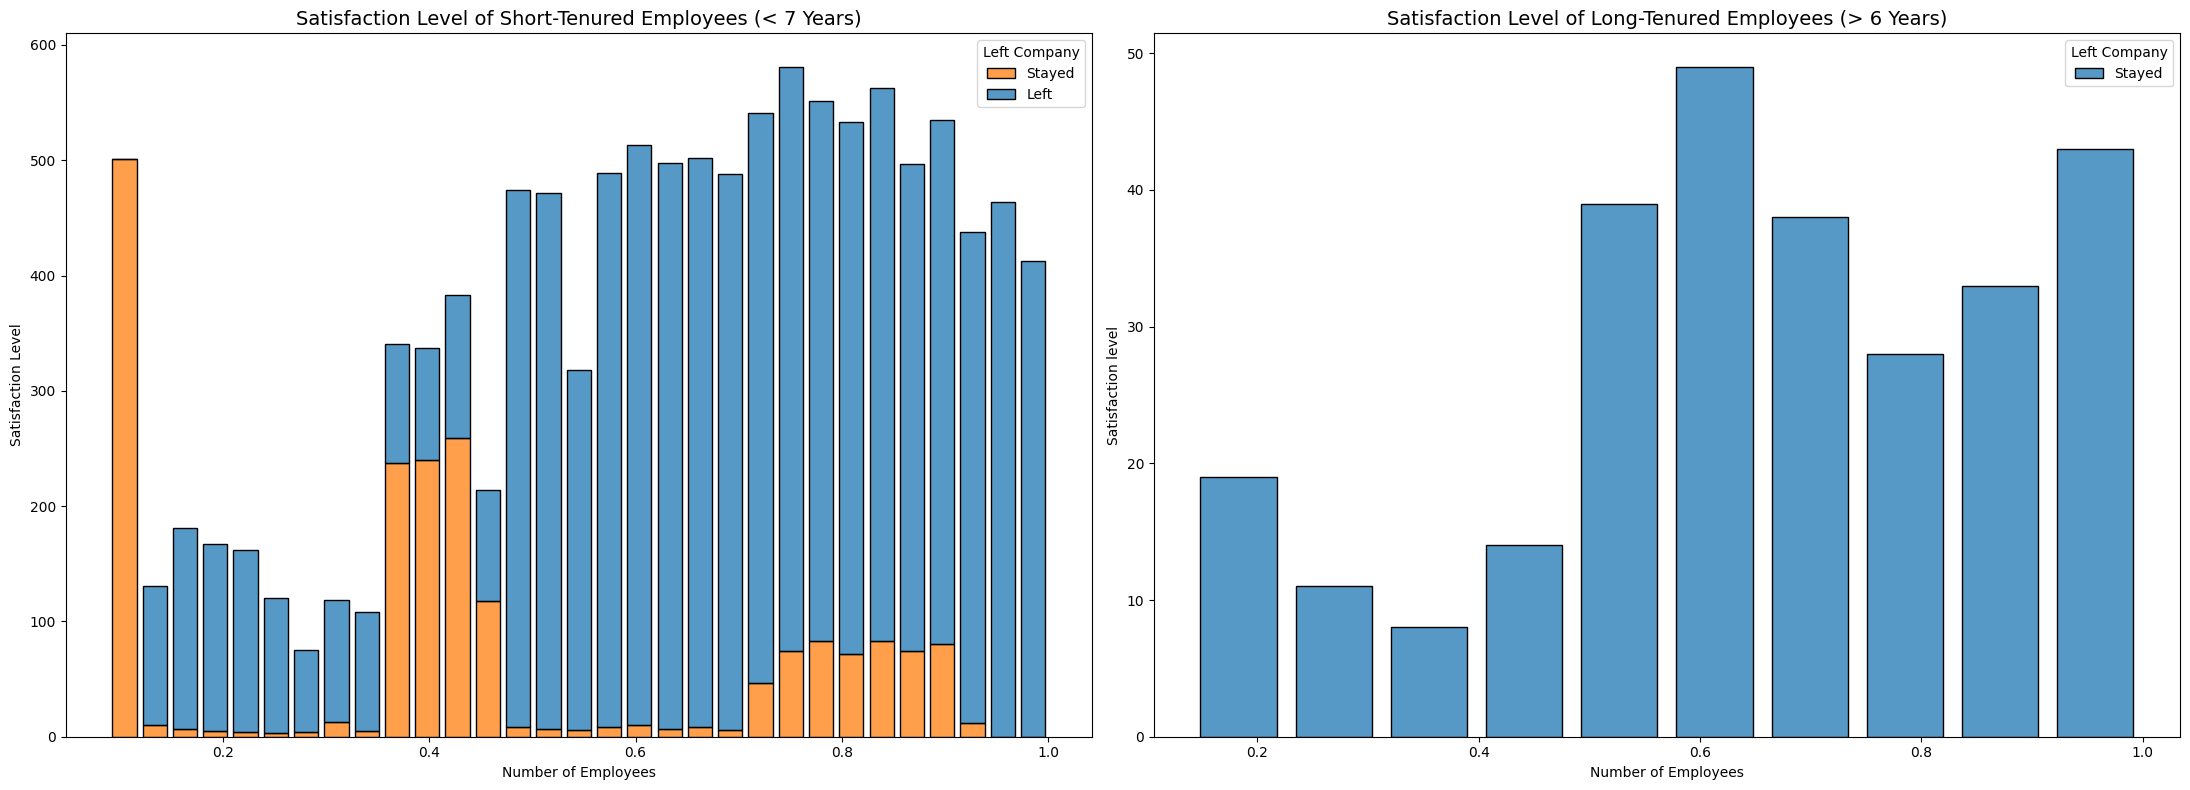

In [33]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='satisfaction_level', hue='left', multiple='stack', shrink=0.8, ax=ax[0])
ax[0].set_title('Satisfaction Level of Short-Tenured Employees (< 7 Years)', fontsize=14)
ax[0].set_xlabel('Number of Employees')
ax[0].set_ylabel('Satisfaction Level')
ax[0].legend(title='Left Company', labels=['Stayed', 'Left'])

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='satisfaction_level', hue='left', multiple='stack', shrink=0.8, ax=ax[1])
ax[1].set_title('Satisfaction Level of Long-Tenured Employees (> 6 Years)', fontsize=14)
ax[1].set_xlabel('Number of Employees')
ax[1].set_ylabel('Satisfaction level')
ax[1].legend(title='Left Company', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

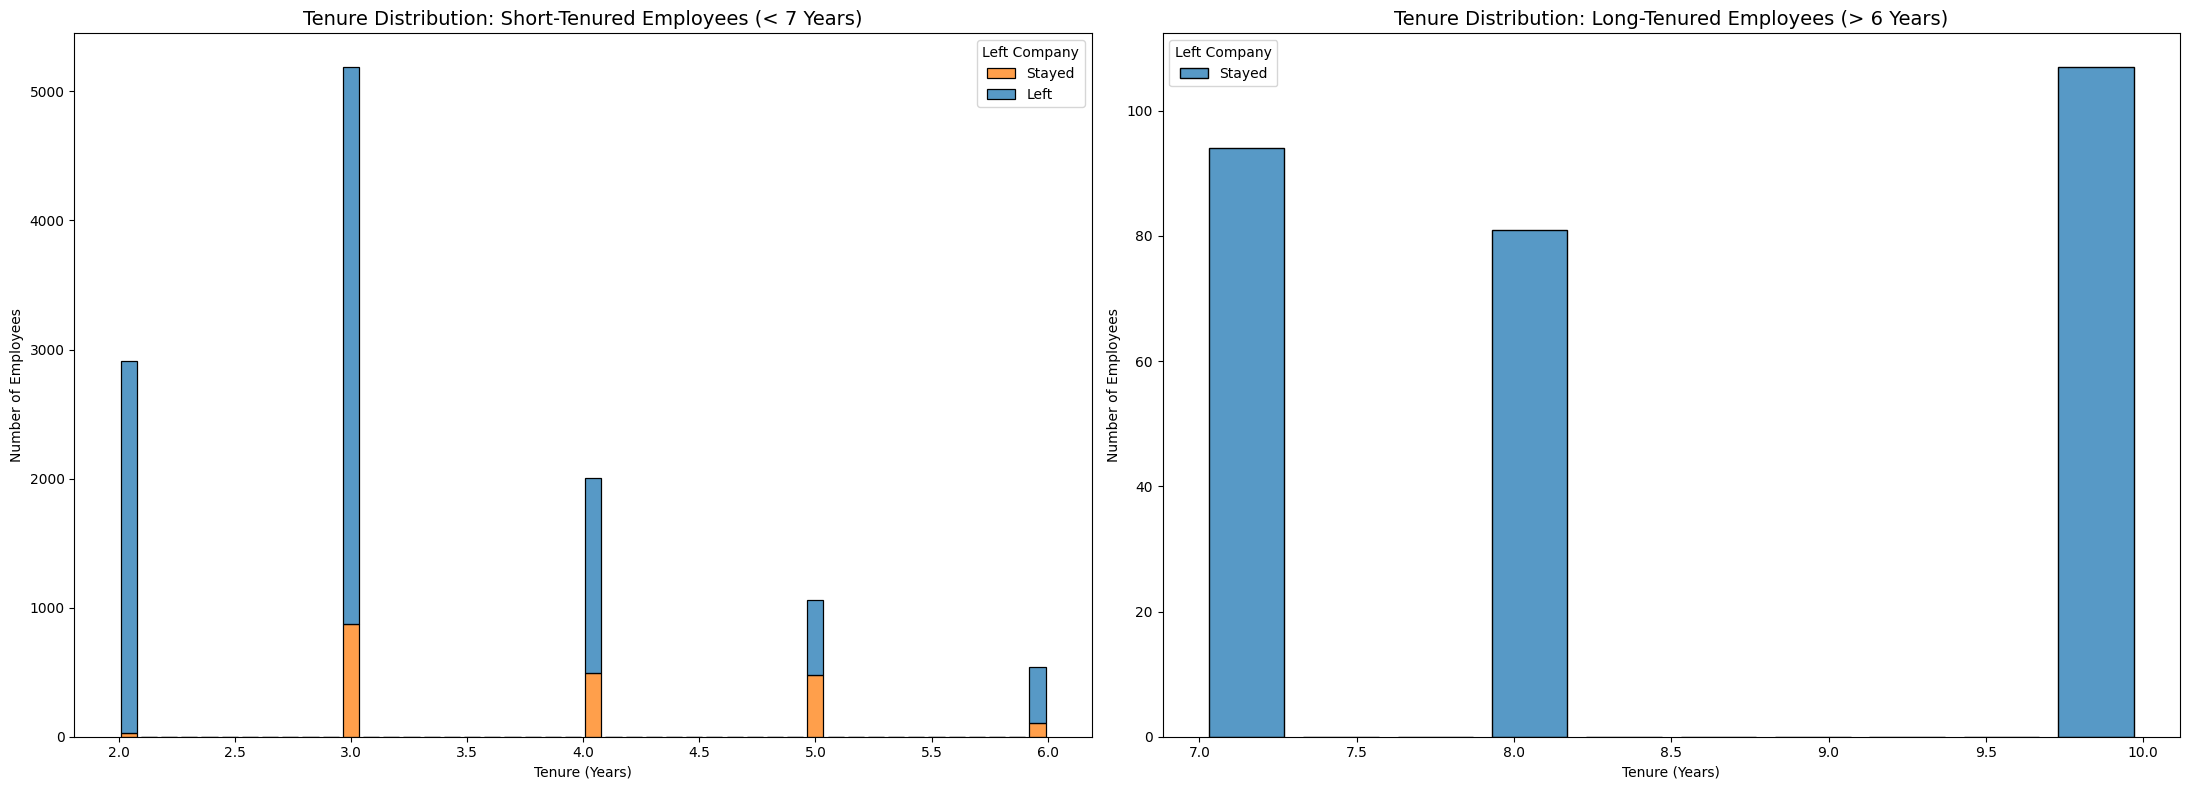

In [34]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram (x = tenure)
sns.histplot(data=tenure_short, x='tenure', hue='left', multiple='stack', shrink=0.8, ax=ax[0])
ax[0].set_title('Tenure Distribution: Short-Tenured Employees (< 7 Years)', fontsize=14)
ax[0].set_xlabel('Tenure (Years)')
ax[0].set_ylabel('Number of Employees')
ax[0].legend(title='Left Company', labels=['Stayed', 'Left'])

# Plot long-tenured histogram (x = tenure)
sns.histplot(data=tenure_long, x='tenure', hue='left', multiple='stack', shrink=0.8, ax=ax[1])
ax[1].set_title('Tenure Distribution: Long-Tenured Employees (> 6 Years)', fontsize=14)
ax[1].set_xlabel('Tenure (Years)')
ax[1].set_ylabel('Number of Employees')
ax[1].legend(title='Left Company', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

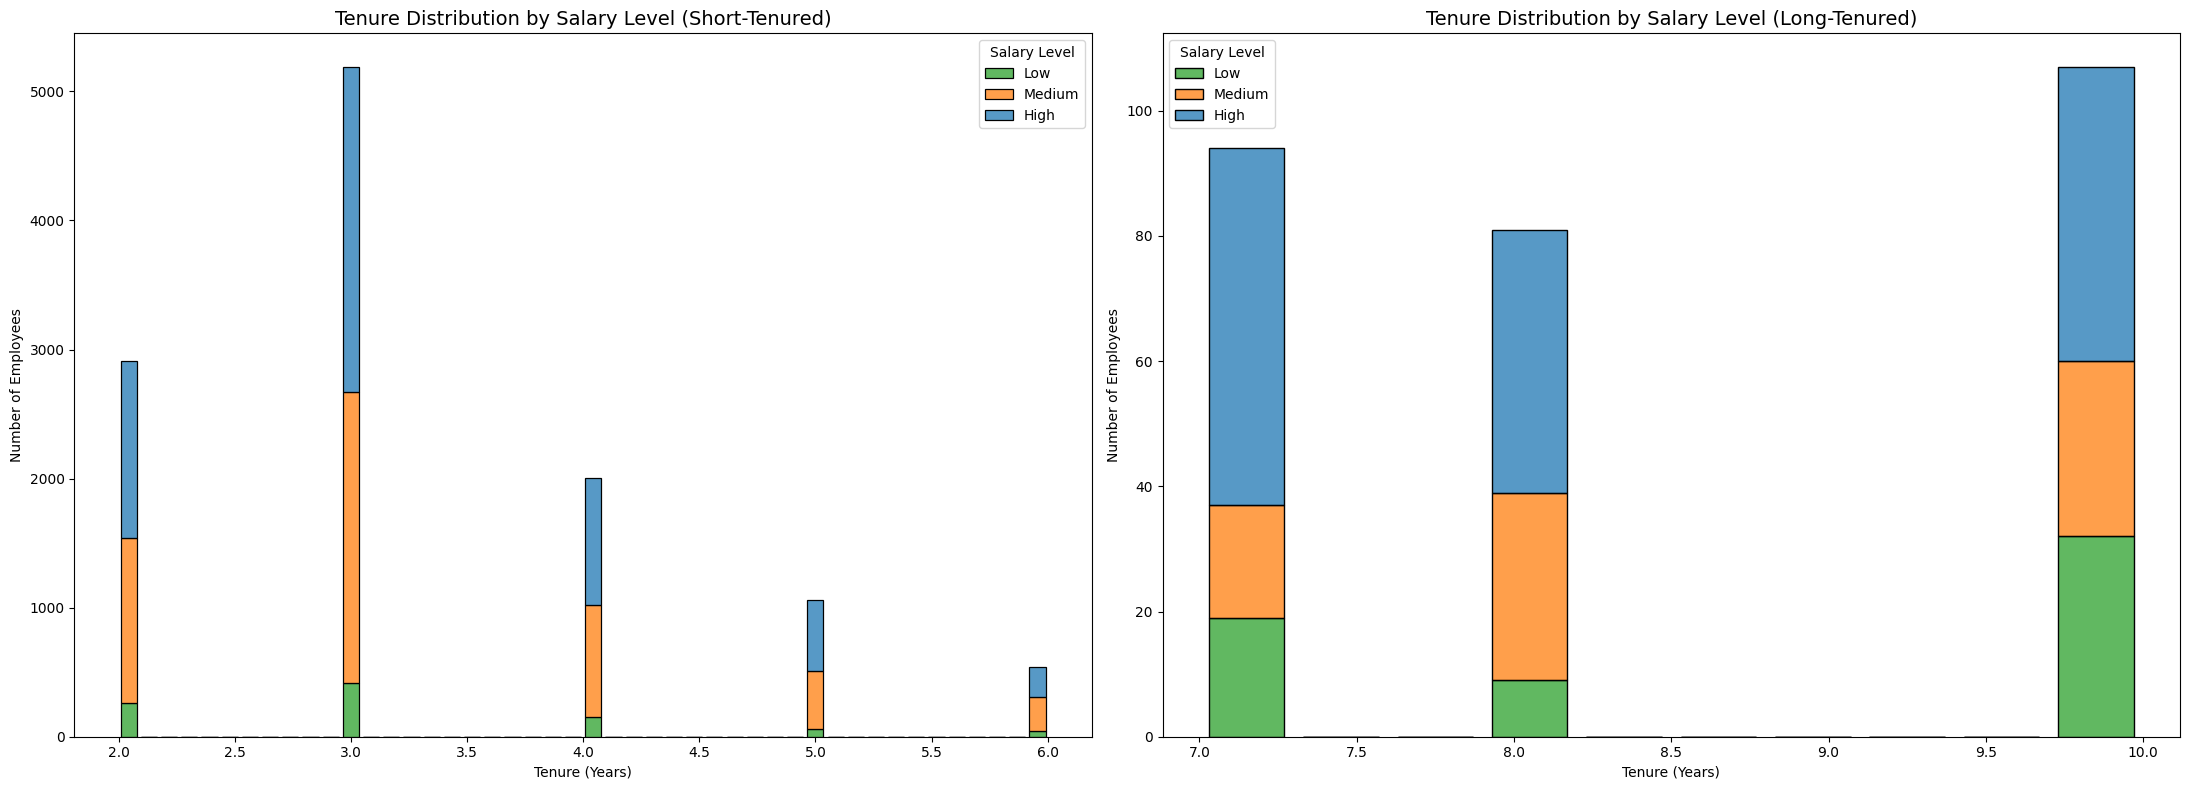

In [35]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram (x = tenure), hue = salary
sns.histplot(data=tenure_short, x='tenure', hue='salary', multiple='stack', shrink=0.8, ax=ax[0])
ax[0].set_title('Tenure Distribution by Salary Level (Short-Tenured)', fontsize=14)
ax[0].set_xlabel('Tenure (Years)')
ax[0].set_ylabel('Number of Employees')
ax[0].legend(title='Salary Level', labels=['Low', 'Medium', 'High'])

# Plot long-tenured histogram (x = tenure), hue = salary
sns.histplot(data=tenure_long, x='tenure', hue='salary', multiple='stack', shrink=0.8, ax=ax[1])
ax[1].set_title('Tenure Distribution by Salary Level (Long-Tenured)', fontsize=14)
ax[1].set_xlabel('Tenure (Years)')
ax[1].set_ylabel('Number of Employees')
ax[1].legend(title='Salary Level', labels=['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

**Next**

Let's explore:
- whether there's a correlation between working long hours and receiving high evaluation scores.
- create a scatterplot of average_monthly_hours versus last_evaluation.


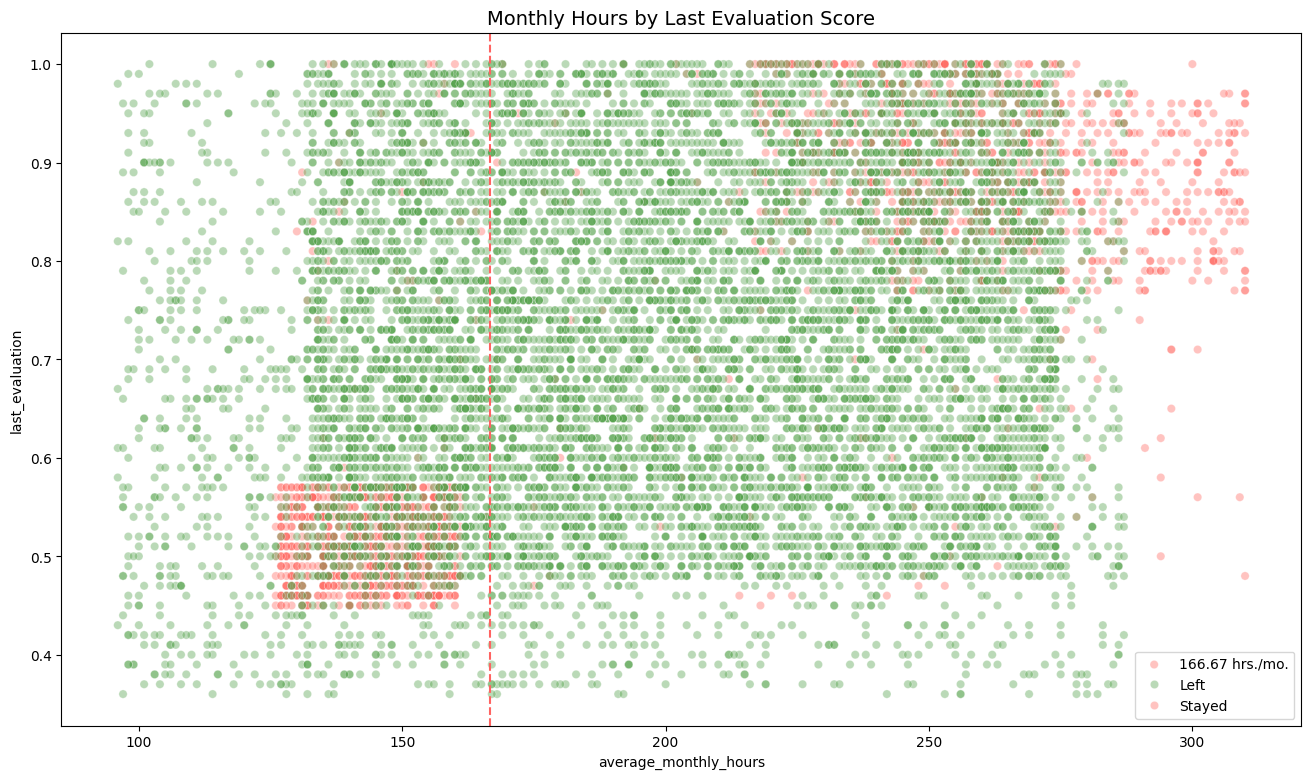

In [36]:
plt.figure(figsize=(16, 9))

sns.scatterplot(
    data=df1,
    x='average_monthly_hours',
    y='last_evaluation',
    hue='left',
    alpha=0.4,
    palette={0: '#54a24b', 1: '#ff6962'}  # 0 = stayed (green), 1 = left (red)
)

plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'Left', 'Stayed'])
plt.title('Monthly Hours by Last Evaluation Score', fontsize=14)
plt.show()

The following observations can be made from the scatterplot above:
 - The scatterplot indicates two groups of employees who left: **overworked employees who performed very well** and **employees who worked
 slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.**
 - There seems to be a correlation between hours worked and evaluation score.
 - There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation
 score.
 - Most of the employees in this company work well over 167 hours per month.

**Next**
  
Let's examine:
- whether employees who worked very long hours were promoted in the last five years.**

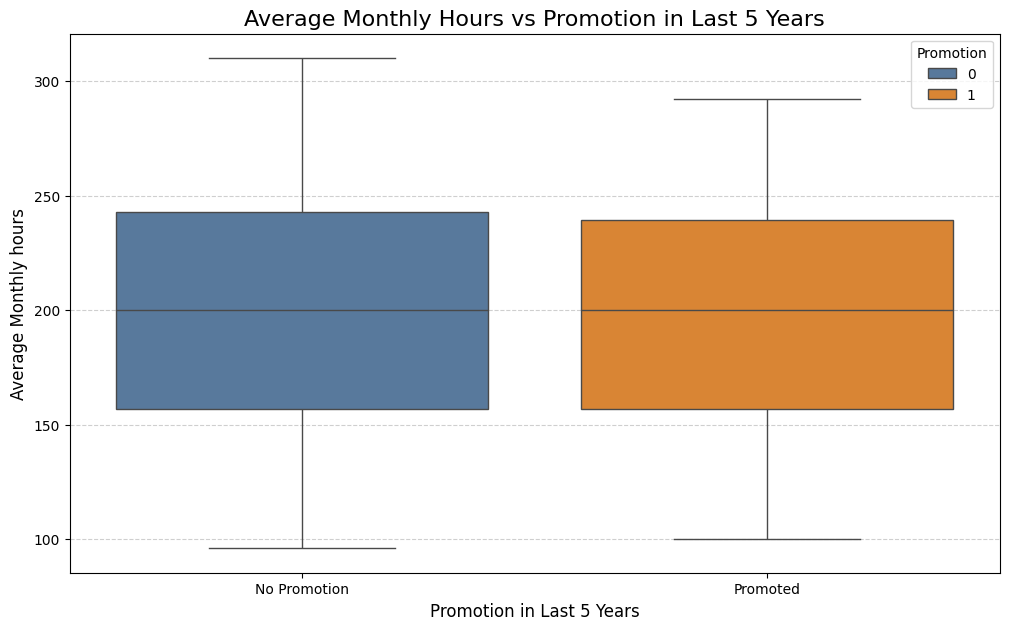

In [37]:
# 📊 Average Monthly Hours vs. Promotion in Last 5 Years
plt.figure(figsize=(12, 7))

sns.boxplot(
    data=df1,
    x='promotion_last_5years',
    y='average_monthly_hours',
    hue='promotion_last_5years',
    palette={0: '#4c78a8', 1: '#f58518'},  # Use integers here
    dodge=False
)

plt.title('Average Monthly Hours vs Promotion in Last 5 Years', fontsize=16)
plt.xlabel('Promotion in Last 5 Years', fontsize=12)
plt.ylabel('Average Monthly hours', fontsize=12)
plt.xticks([0, 1], ['No Promotion', 'Promoted'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Promotion')
plt.show()

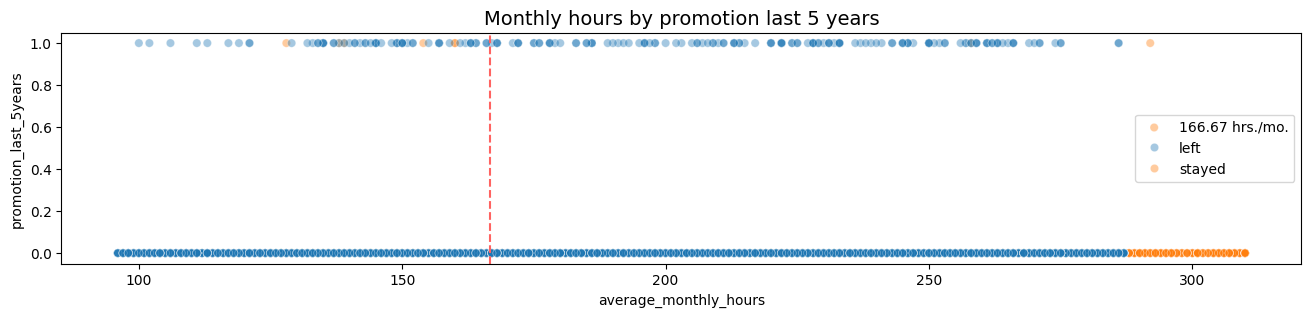

In [38]:
# 📊 Monthly hours by promotion in the last 5 years
plt.figure(figsize=(16, 3))
sns.scatterplot(
    data=df1,
    x='average_monthly_hours',
    y='promotion_last_5years',
    hue='left',
    alpha=0.4
)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
 - Very few employees who were promoted in the last five years left
 - Very few employees who worked the most hours were promoted
 - All of the employees who left were working the longest hours

**Next**

 Let's inspect how the employees who left are distributed across departments.

In [39]:
# 📋 Count of employees by department
department_counts = df1['department'].value_counts()
print(department_counts)

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64


<Figure size 1400x700 with 0 Axes>

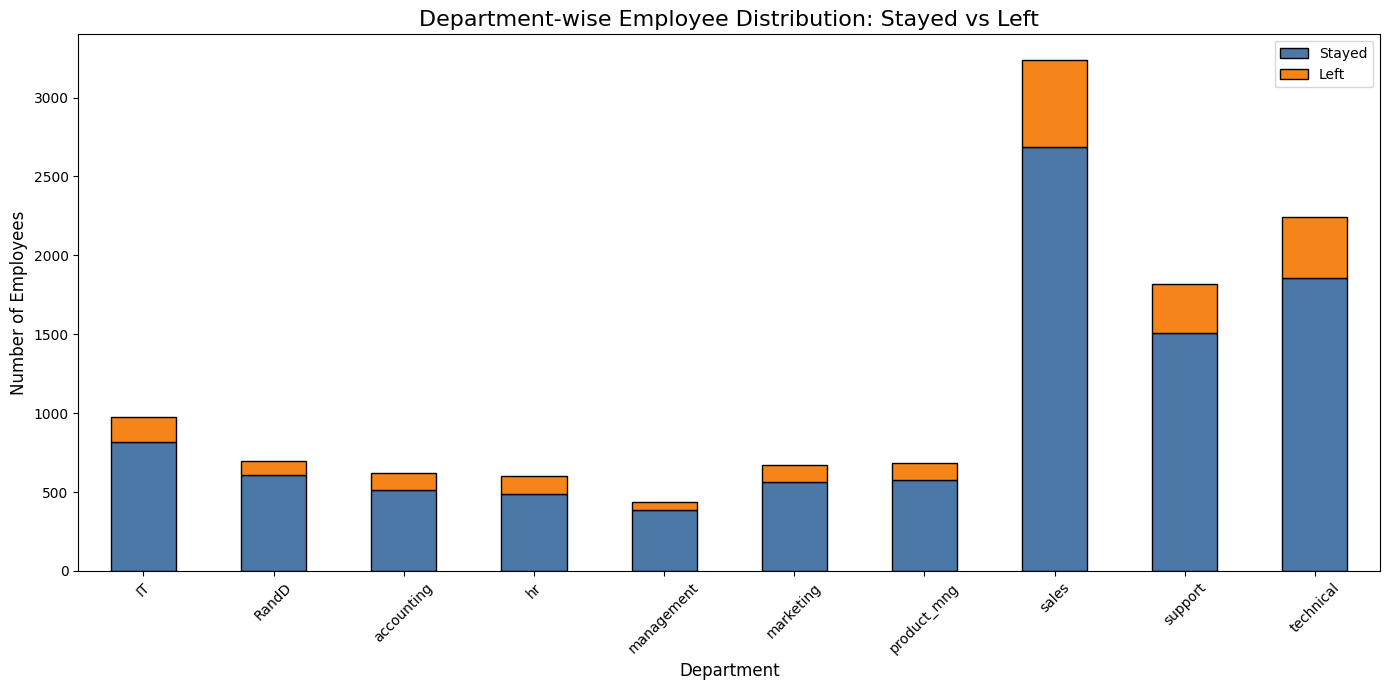

In [40]:
# Set figure size
plt.figure(figsize=(14, 7))

# Create crosstab of department vs left status
dept_counts = pd.crosstab(df1['department'], df1['left'])

# Plot as stacked bar chart
dept_counts.plot(kind='bar', stacked=True, figsize=(14, 7), 
                 color=['#4c78a8', '#f58518'], edgecolor='black')

# Add labels and title
plt.title('Department-wise Employee Distribution: Stayed vs Left', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

**Lastly, let's check for strong correlations between variables in the data:**

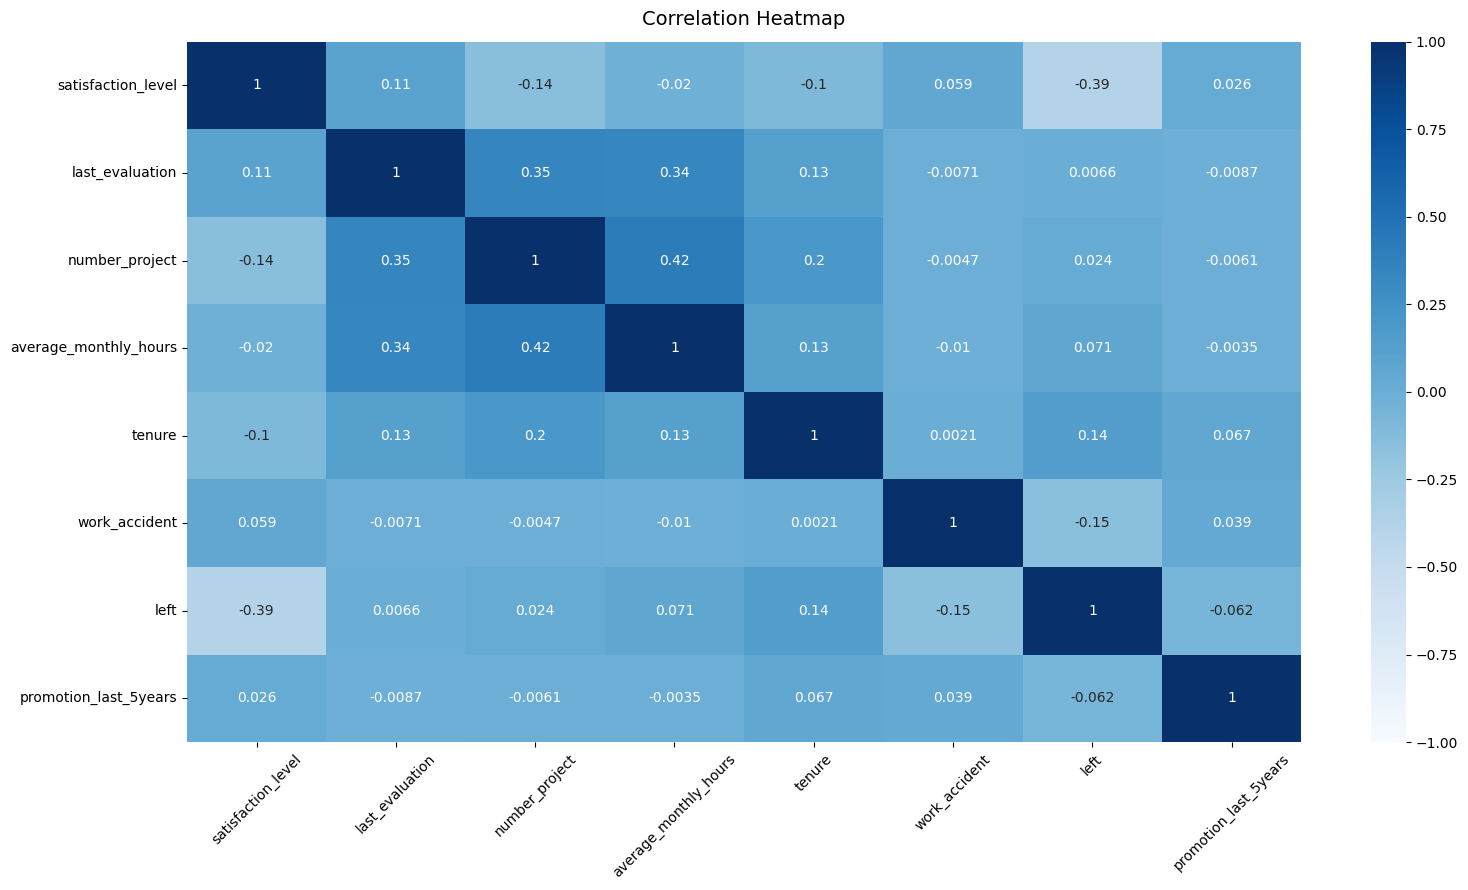

In [41]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(
    df.corr(numeric_only=True),
    vmin=-1, vmax=1,
    annot=True,
    cmap=sns.color_palette("Blues", as_cmap=True)
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each
 other, and whether an employee leaves is negatively correlated with their satisfaction level

**Insights**

 It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and
 generally lower satisfaction levels. It can be ungratifying to work long hours and not receiving promotions or good evaluation scores. There's a
 sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at
 the company, they tend not to leave.

### **Reflecting questions to be observed after ANALYZE stage:**
---

**1. What did you observe about the relationships between variables?**
Low satisfaction and high average monthly hours were strongly linked to employee attrition.

**2. What do you observe about the distributions in the data?**
Some variables like satisfaction and evaluation had skewed or bimodal distributions.

**3. What transformations did you make with your data? Why did you choose to make those decisions?**
Applied one-hot encoding to categorical variables and normalized numerical features to prepare data for machine learning.

**4. What are some purposes of EDA before constructing a predictive model?**
To understand data structure, detect anomalies, find trends, and guide feature engineering.

**5. What resources do you find yourself using as you complete this stage?**

* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Seaborn Documentation](https://seaborn.pydata.org/)
* [Scikit-learn Guide](https://scikit-learn.org/stable/user_guide.html)

**6. Do you have any ethical considerations in this stage?**
Yes—ensure fair data representation and avoid bias or overfitting that could harm decision-making.

# Next 
pa**C**e: Construct Stage

**It includes**
 - Determine which models are most appropriate
 - Construct the model
 - Confirm model assumptions
 - Evaluate model results to determine how well your model fits the data

# Recalling model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

# Step 3. Model Building:
 - Fitting a model that predicts the outcome variable using two or more independent variables
 - Checking model assumptions
 - Evaluating the model
 
**Identifying the type of prediction task.**
     
 Whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More
 specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating
 employee didn't leave) or simply (Left/Didn't Leave).
 
**Identifying the types of models most appropriate for the task.**

 Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression
 model, or a Tree-based Machine Learning model.
 So we could proceed with one of the two following approaches. Or,  implement both and determine how they compare.
 
**Modeling Approach A:** 

**Logistic Regression Model**
This approach covers implementation of Logistic Regression.

**Key Notes in Logistic regression model** are that:
 - Binomial logistic regression suits the task because it involves binary classification.
 - Before splitting the data, encode the non-numeric variables. There are two: department and salary .
 - department is a categorical variable, which means you can dummy it for modeling.
 - salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.


In [42]:
# Step 1: Copy the dataframe
df_encoded = df1.copy()

# Step 2: Encode the `salary` column as ordinal (low < medium < high)
salary_order = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_encoded['salary'].map(salary_order)

# Step 3: Dummy encode the `department` column
df_encoded = pd.get_dummies(df_encoded, columns=['department'], drop_first=True)

# Step 4: Display the new dataframe
df_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

**Creating a heatmap to visualize how correlated variables are:**

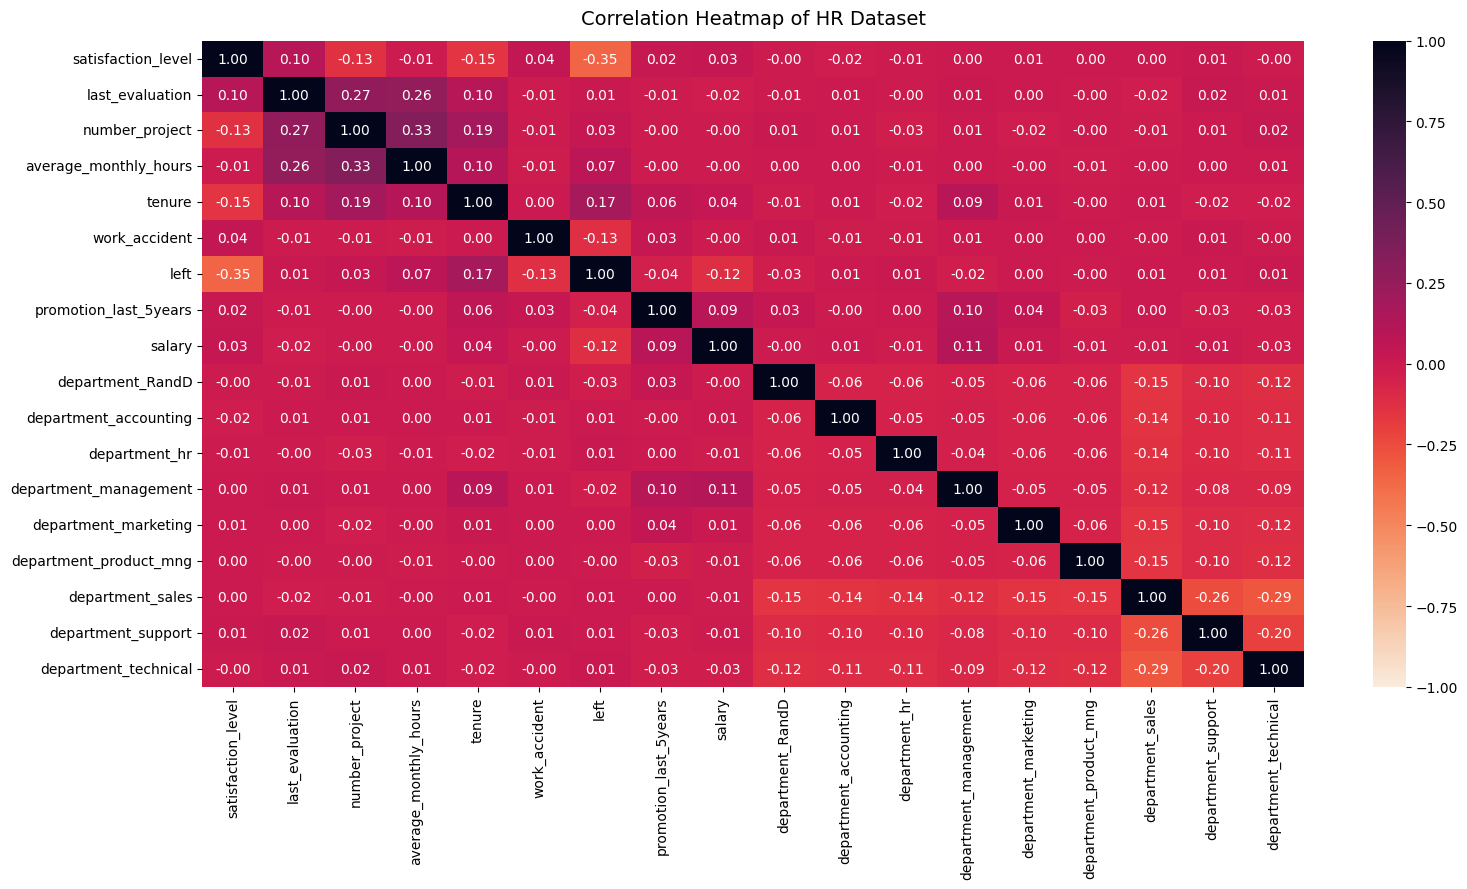

In [43]:
plt.figure(figsize=(16, 9))

# Generate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette("rocket_r", as_cmap=True)  # warm reversed theme
)

# Title
heatmap.set_title('Correlation Heatmap of HR Dataset', fontdict={'fontsize': 14}, pad=12)

plt.tight_layout()
plt.show()

**Creating a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't:**

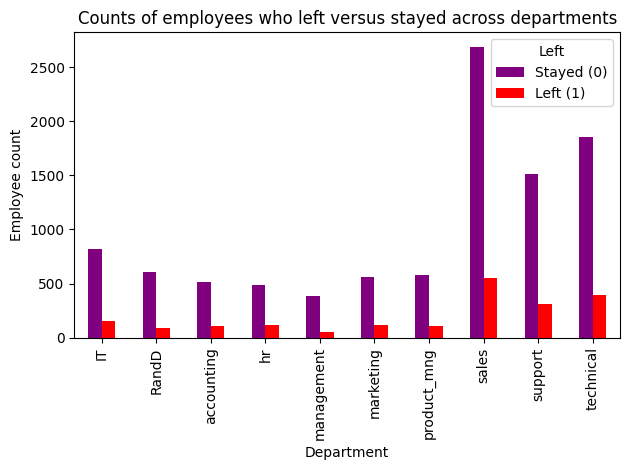

In [44]:
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', stacked=False, color=['purple', 'red'])

plt.title('Counts of employees who left versus stayed across departments')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.legend(title='Left', labels=['Stayed (0)', 'Left (1)'])

plt.tight_layout()
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were
 identified earlier.

**Filtering out Outliers in Tenure column:**

In [45]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable

Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df1[(df1['tenure'] >= lower_bound) & (df1['tenure'] <= upper_bound)]

# Display first few rows of new dataframe
df_no_outliers.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low

**Isolating the outcome variable, which is the variable we want our model to predict:**

In [46]:
# Isolate the outcome variable
outcome = df_no_outliers['left']

# Display first few rows of the outcome variable
outcome.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

**Selecting the features we want to use in our model. Considering which variables will help us predict the outcome variable, left:**

In [47]:
# Select features for the model (excluding the target 'left')
features = df_no_outliers[['satisfaction_level', 'last_evaluation', 'number_project',
                           'average_monthly_hours', 'tenure', 'work_accident',
                           'promotion_last_5years', 'salary', 'department']]

# Display first few rows of the selected features
features.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary department  
0       3              0                      0     low      sales  
2       4              0                      0  medium      sales  
3       5              0                      0     low      sales  
4       3              0                      0     low      sales  
5       3              0                      0     low      sales

**Splitting the data into training set and testing set. Also stratifying based on the values in y , since the classes are unbalanced:**

In [48]:
X = features
y = outcome

In [49]:
# Assign features and outcome
X = features
y = outcome

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8375, 9)
X_test shape: (2792, 9)
y_train shape: (8375,)
y_test shape: (2792,)


In [50]:
X_train.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
promotion_last_5years      int64
salary                    object
department                object
dtype: object

**Constructing a logistic regression model and fit it to the training dataset:**

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.45      0.27      0.34       471

    accuracy                           0.82      2792
   macro avg       0.66      0.60      0.62      2792
weighted avg       0.79      0.82      0.80      2792



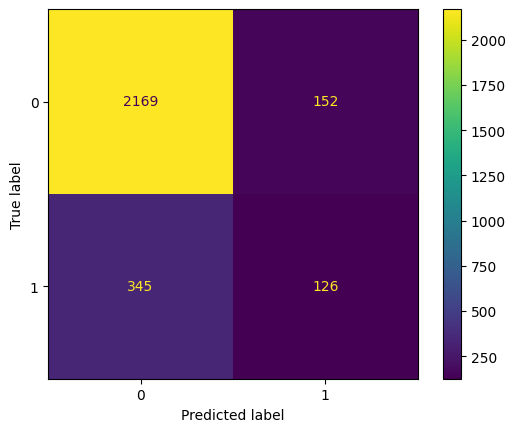

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Define categorical and numerical columns
categorical_cols = ['salary', 'department']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Step 2: Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Step 3: Build the pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(random_state=42, max_iter=1000))
])

# Step 4: Fit the model to the training data
pipeline.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [52]:
# Combine train and test sets to ensure consistent encoding
X_combined = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical variables
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

# Split back into train and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X_train), :]
X_test_encoded = X_combined_encoded.iloc[len(X_train):, :]

**Next**

**1. Test the logistic regression model: use the model to make predictions on the test set.**

**2. Create a confusion matrix to visualize the results of the logistic regression model.**

First 10 predictions: [0 0 0 0 0 0 1 0 0 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.45      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



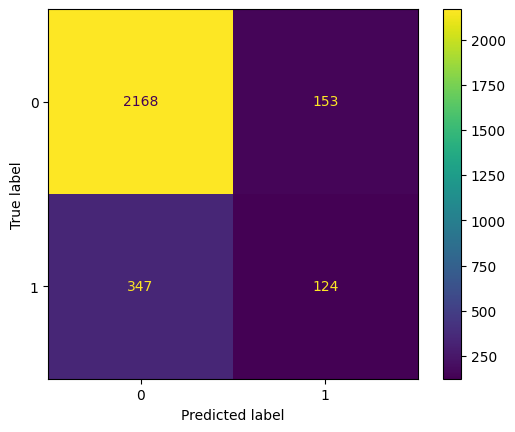

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Scale the encoded features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 2: Fit the logistic regression model with more iterations
log_clf = LogisticRegression(random_state=42, max_iter=1000)
log_clf.fit(X_train_scaled, y_train)

# Step 3: Predict on the scaled test set
y_pred = log_clf.predict(X_test_scaled)

# Step 4: View first few predictions
print("First 10 predictions:", y_pred[:10])

# Step 5: Optional - Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Optional - Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_clf, X_test_scaled, y_test)

**Analysis**

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.
 - True negatives: The number of people who did not leave that the model accurately predicted did not leave.
 - False positives: The number of people who did not leave the model inaccurately predicted as leaving.
 - False negatives: The number of people who left that the model inaccurately predicted did not leave
 - True positives: The number of people who left the model accurately predicted as leaving
 
Note: (A perfect model would yield all true negatives and true positives, and no false negatives or false positives.)
 
So let's Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.
 
For this we need to:
 - Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

First 10 predictions: [0 0 0 0 0 0 1 0 0 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2321
           1       0.48      0.92      0.63       471

    accuracy                           0.82      2792
   macro avg       0.73      0.86      0.76      2792
weighted avg       0.90      0.82      0.84      2792



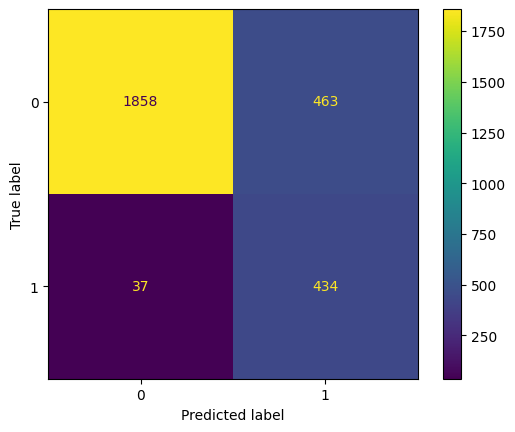

In [54]:
log_clf = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_clf.fit(X_train_scaled, y_train)
y_pred = log_clf.predict(X_test_scaled)

# Evaluate
print("First 10 predictions:", y_pred[:10])
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(log_clf, X_test_scaled, y_test)

In [55]:
df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

 **Findings:**
 There is an approximately 76%-23% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced,
 we might want to resample the data to make it more balanced. In this case, we can use this data without modifying the class balance and
 continue evaluating the model.

In [56]:
from sklearn.metrics import classification_report

# Generate and print classification report
report = classification_report(y_test, y_pred, target_names=["Stayed (0)", "Left (1)"])
print("Classification Report for Logistic Regression:\n")
print(report)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

  Stayed (0)       0.98      0.80      0.88      2321
    Left (1)       0.48      0.92      0.63       471

    accuracy                           0.82      2792
   macro avg       0.73      0.86      0.76      2792
weighted avg       0.90      0.82      0.84      2792



 The classification report above shows that the logistic regression model achieved a precision of 90%, recall of 82%, f1-score of 84% (all weighted
 averages), and accuracy of 85%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

**Modeling Approach B: Tree-based Model**
- This approach covers implementation of Decision Tree and Random Forest.

**Isolating the outcome variable:**

In [57]:
# Re-import or recreate the original DataFrame `df` if needed
# Then re-encode categorical variables
df_enc = pd.get_dummies(df, drop_first=True)

# Now isolate the outcome variable
y = df_enc['left']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


**Now selecting the features:**

In [58]:
# Select features by dropping the target column 'left'
X = df_enc.drop('left', axis=1)

# Display the first few rows of features
print(X.head())

   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  department_RandD  \
0       3              0                      0             False   
1       6              0                      0             False   
2       4              0                      0             False   
3       5              0                      0             False   
4       3              0                      0             False   

   department_accounting  department_hr  department_management  \
0                  False        

**Splitting the data into training, validating, and testing sets:**

In [59]:
from sklearn.model_selection import train_test_split

# Split the features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # maintain same proportion of classes
)

# Display the shape of resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11999, 18)
X_test shape: (3000, 18)
y_train shape: (11999,)
y_test shape: (3000,)


# Decision tree - Round 1
 **Constructing a decision tree model and setting up cross-validated grid-search to exhuastively search for the best model parameters:**

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Define hyperparameters to search over
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

# Define multiple scoring metrics
scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc'
}

# Set up GridSearchCV with cross-validation and refit based on ROC AUC
tree1 = GridSearchCV(
    estimator=tree,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='roc_auc'
)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define hyperparameter grid
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

# Define multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV
tree1 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=cv_params,
    cv=5,
    scoring=scoring,
    refit='accuracy',  # You can change this to 'roc_auc' if preferred
    return_train_score=True
)

 **Fitting the decision tree model to the training data:**

In [62]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 22.3 s
Wall time: 22.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

**Identifying the optimal values for the decision tree parameters:**

In [63]:
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

**Identifying the best AUC score achieved by the decision tree model on the training set:**

In [64]:
# Get best AUC score from cross-validation
best_auc = tree1.cv_results_['mean_test_roc_auc'][tree1.best_index_]
print(f"Best cross-validated AUC score: {best_auc:.4f}")

Best cross-validated AUC score: 0.9804


**Finding:** This is a strong AUC score, which shows that this model can predict employees who will leave very well.

**Let's now write a function that will help extracting all the scores from the grid search:**

In [65]:
# Mapping input metric names to actual score column names in cv_results_
metric_map = {
    'accuracy': 'mean_test_accuracy',
    'precision': 'mean_test_precision',
    'recall': 'mean_test_recall',
    'f1': 'mean_test_f1',
    'roc_auc': 'mean_test_roc_auc'
}

In [66]:
# Convert the cross-validation results into a pandas DataFrame
cv_results_df = pd.DataFrame(tree1.cv_results_)

In [67]:
def extract_best_scores(metric: str):
    """
    Extracts the row with the highest mean cross-validated score
    for a given metric and returns all relevant evaluation metrics.
    """
    if metric not in metric_map:
        raise ValueError(f"Metric '{metric}' not supported. Choose from: {list(metric_map.keys())}")
    
    score_col = metric_map[metric]
    
    # Get index of best row based on the selected metric
    best_index = cv_results_df[score_col].idxmax()
    
    # Extract the best row
    best_row = cv_results_df.loc[best_index]
    
    # Return relevant metrics from the best row
    results = {
        'Best Params': best_row['params'],
        'Accuracy': best_row['mean_test_accuracy'],
        'Precision': best_row['mean_test_precision'],
        'Recall': best_row['mean_test_recall'],
        'F1 Score': best_row['mean_test_f1'],
        'ROC AUC': best_row['mean_test_roc_auc']
    }
    return results

In [68]:
# Example: Get best row based on AUC and display as a table
best_auc_results = extract_best_scores('roc_auc')
results_df = pd.DataFrame([best_auc_results])
display(results_df)

Best Params  Accuracy  Precision  \
0  {'max_depth': None, 'min_samples_leaf': 5, 'mi...  0.976332   0.962629   

     Recall  F1 Score   ROC AUC  
0  0.936995  0.949597  0.984341

**Finding:** All of these scores from the decision tree model are strong indicators of good model performance.
     
Note: (Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions)

 Hence, constructing a random forest model next.

# Random forest - Round 1

**Constructing a random forest model and setting up cross-validated grid-search to exhuastively search for the best model parameters:**

In [69]:
# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Assign a dictionary of scoring metrics to capture
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring=rf_scoring,
    refit='roc_auc',
    cv=5,
    return_train_score=True,
    verbose=1
)

**Fitting the random forest model to the training data:**

In [70]:
%%time
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 6min 2s
Wall time: 6min 7s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 8, 16], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [71]:
# Check best hyperparameters from grid search
rf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [72]:
# Check best ROC AUC score
best_auc = rf_grid.cv_results_['mean_test_roc_auc'][rf_grid.best_index_]
print(f"Best cross-validated AUC score: {best_auc:.4f}")

Best cross-validated AUC score: 0.9941


In [73]:
# Create a DataFrame from cross-validation results
results_df = pd.DataFrame(rf_grid.cv_results_)

# Locate the row with the best ROC AUC score
best_row = results_df.loc[rf_grid.best_index_]

# Extract and display metrics in a summary DataFrame
summary_table = pd.DataFrame({
    'Best Params': [best_row['params']],
    'Accuracy': [best_row['mean_test_accuracy']],
    'Precision': [best_row['mean_test_precision']],
    'Recall': [best_row['mean_test_recall']],
    'F1 Score': [best_row['mean_test_f1']],
    'ROC AUC': [best_row['mean_test_roc_auc']]
})

summary_table

Best Params  Accuracy  Precision  \
0  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  0.990416   0.994215   

     Recall  F1 Score   ROC AUC  
0  0.965355  0.979559  0.994107

**Specifying path to where we want to save our model:**


In [74]:
# Define a path to the folder where you want to save the model
import os

model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "best_random_forest_model.pkl")

In [75]:
# Save the best model using joblib
import joblib

joblib.dump(rf_grid.best_estimator_, model_path)

print(f"Model saved to: {model_path}")

Model saved to: saved_models\best_random_forest_model.pkl


**Defining functions to pickle the model and read in the model:**

In [76]:
import os
import pickle

# Function to save a model as a pickle file
def write_pickle(path: str, model_object, save_as: str):
    """
    Save a model to a specified folder as a pickle file.

    Parameters:
    path (str): Folder path where you want to save the model.
    model_object: Trained model object to pickle.
    save_as (str): Desired filename (without extension) for the saved model.
    """
    os.makedirs(path, exist_ok=True)
    full_path = os.path.join(path, save_as + '.pickle')
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)
    print(f"✅ Model successfully saved to: {full_path}")

# Function to load a pickled model
def read_pickle(path: str, saved_model_name: str):
    """
    Load a pickled model from a specified folder.

    Parameters:
    path (str): Folder path where the model is stored.
    saved_model_name (str): Filename of the saved model (without extension).

    Returns:
    model: The unpickled model object.
    """
    full_path = os.path.join(path, saved_model_name + '.pickle')
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"❌ No model found at: {full_path}")
    with open(full_path, 'rb') as to_read:
        model = pickle.load(to_read)
    print(f"📦 Model successfully loaded from: {full_path}")
    return model

**Using the functions defined above to save the model in a pickle file and then read it in:**

In [77]:
# write pickle

# Save the best random forest model to a pickle file
write_pickle('saved_models', rf_grid.best_estimator_, 'best_random_forest_model')

✅ Model successfully saved to: saved_models\best_random_forest_model.pickle


In [78]:
# read pickle

# Load the saved random forest model from the pickle file
loaded_rf_model = read_pickle('saved_models', 'best_random_forest_model')

📦 Model successfully loaded from: saved_models\best_random_forest_model.pickle


**Identifying the best AUC score achieved by the random forest model on the training set:**

In [79]:
# Check best AUC score on CV
print("Best cross-validated AUC score:", round(rf_grid.best_score_, 4))

Best cross-validated AUC score: 0.9941


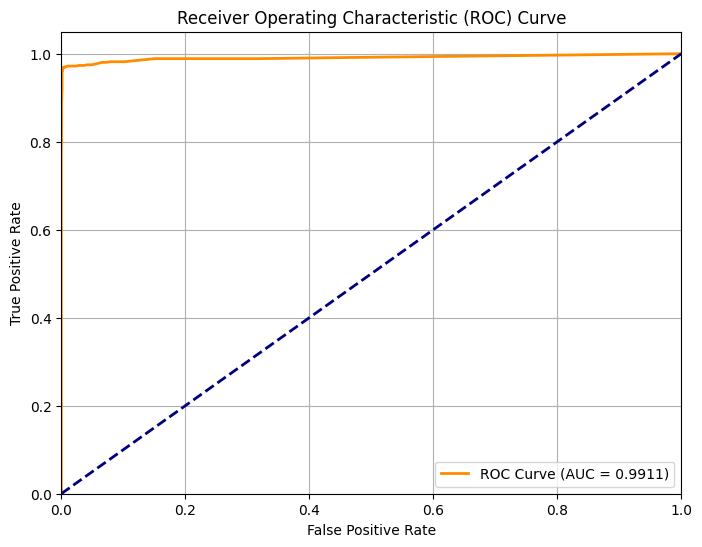

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 🧪 Get predicted probabilities for the positive class
y_proba = loaded_rf_model.predict_proba(X_test)[:, 1]

# 📉 Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 🎯 Calculate AUC
roc_auc = auc(fpr, tpr)

# 📊 Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Identifying the optimal values for the parameters of the random forest model:**

In [81]:
# Display the best parameters found by GridSearchCV
print("Best hyperparameters found by GridSearchCV:")
print(rf_grid.best_params_)

Best hyperparameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
import pandas as pd

# Function to collect and format CV results
def make_results(model_name, model, scoring_metric='accuracy'):
    """
    Extract mean test score from GridSearchCV and return as a DataFrame.

    Parameters:
    model_name (str): Name to label the model.
    model: A fitted GridSearchCV object.
    scoring_metric (str): The metric used during cross-validation (e.g., 'accuracy', 'roc_auc').

    Returns:
    pd.DataFrame: Formatted results with model name and score.
    """
    score = model.best_score_
    results_df = pd.DataFrame({
        'model': [model_name],
        scoring_metric: [round(score, 4)]
    })
    return results_df

In [83]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import pandas as pd

def make_results(model_name, model, X, y):
    """
    Perform cross-validation and return key evaluation metrics in a DataFrame.
    
    Parameters:
    - model_name (str): Name for the model.
    - model: Estimator (like DecisionTreeClassifier or GridSearchCV object).
    - X, y: Features and target.

    Returns:
    - DataFrame with precision, recall, F1, accuracy, and AUC.
    """
    y_pred = cross_val_predict(model, X, y, cv=5)
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    results_df = pd.DataFrame({
        'model': [model_name],
        'precision': [precision_score(y, y_pred)],
        'recall': [recall_score(y, y_pred)],
        'F1': [f1_score(y, y_pred)],
        'accuracy': [accuracy_score(y, y_pred)],
        'auc': [roc_auc_score(y, y_proba)]
    })
    
    return results_df.round(6)

**Collecting the evaluation scores on the training set for the decision tree and random forest models:**

In [84]:
tree1_cv_results = make_results('decision tree cv', tree1, X, y)
rf_cv_results = make_results('random forest cv', rf_grid.best_estimator_, X, y)

print(tree1_cv_results)
print(rf_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.951934  0.937272  0.944546  0.973798  0.967908
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.989744  0.972837  0.981217  0.991133  0.992971


**Finding:**
The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model mostly
 outperforms the decision tree model.

**Next, Let's evaluate the final model on the test set:**

So:
- Defining a function that gets all the scores from a model's predictions.

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import pandas as pd

def get_scores(model_name: str, model, X_test_data, y_test_data):
    """
    Generate evaluation scores for a fitted model on test data.

    Parameters:
    - model_name (str): Name of the model.
    - model: A fitted GridSearchCV or classifier object.
    - X_test_data: Features from the test set.
    - y_test_data: Labels from the test set.

    Returns:
    - A pandas DataFrame with precision, recall, F1, accuracy, and AUC.
    """
    # If model is a GridSearchCV, use best_estimator_, else use model directly
    best_model = model.best_estimator_ if hasattr(model, 'best_estimator_') else model
    
    preds = best_model.predict(X_test_data)
    probs = best_model.predict_proba(X_test_data)[:, 1]

    results_df = pd.DataFrame({
        'model': [model_name],
        'precision': [precision_score(y_test_data, preds)],
        'recall': [recall_score(y_test_data, preds)],
        'F1': [f1_score(y_test_data, preds)],
        'accuracy': [accuracy_score(y_test_data, preds)],
        'auc': [roc_auc_score(y_test_data, probs)]
    })

    return results_df.round(6)

**Now using the best performing model to predict on the test set:**

In [86]:
tree_test_results = get_scores('decision tree test', tree1, X_test, y_test)
rf_test_results = get_scores('random forest test', rf_grid, X_test, y_test)

print(tree_test_results)
print(rf_test_results)

                model  precision    recall        F1  accuracy      auc
0  decision tree test   0.979412  0.932773  0.955524  0.979333  0.98136
                model  precision    recall        F1  accuracy       auc
0  random forest test   0.994228  0.964986  0.979389  0.990333  0.991123


In [87]:
# combining results

final_test_scores = pd.concat([tree_test_results, rf_test_results], ignore_index=True)
print(final_test_scores)

                model  precision    recall        F1  accuracy       auc
0  decision tree test   0.979412  0.932773  0.955524  0.979333  0.981360
1  random forest test   0.994228  0.964986  0.979389  0.990333  0.991123


In [88]:
# For Decision Tree
tree_preds = tree1.best_estimator_.predict(X_test)
tree_probs = tree1.best_estimator_.predict_proba(X_test)[:, 1]

# For Random Forest
rf_preds = rf_grid.best_estimator_.predict(X_test)
rf_probs = rf_grid.best_estimator_.predict_proba(X_test)[:, 1]

In [89]:
# Decision Tree quick check
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_preds))
print("AUC:", round(roc_auc_score(y_test, tree_probs), 4))

# Random Forest quick check
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("AUC:", round(roc_auc_score(y_test, rf_probs), 4))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.93      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

AUC: 0.9814

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

AUC: 0.9911


**Finding:** The test scores are very similar to the validation scores, which is good. This appears to be a strong model.

**Feature Engineering**

 As being skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use
 data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect
 to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.
 
 In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the
 average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been
 identified by management as people to be fired, they may be working fewer hours.

**The first round of decision tree and random forest models included all variables as features. The next round will incorporate feature engineering to
 build improved models.**
 
**Method:** We would do it by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. 
We would call this new feature overworked . It will be a binary variable.

In [90]:
# Drop `satisfaction_level` and save to a new DataFrame
df_no_satisfaction = df.drop('satisfaction_level', axis=1)

# Display first few rows
df_no_satisfaction.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years department  salary  
0              0     1                      0      sales     low  
1              0     1                      0      sales  medium  
2              0     1                      0      sales  medium  
3              0     1                      0      sales     low  
4              0     1                      0      sales     low

In [91]:
# Create 'overworked' column as a copy of 'average_monthly_hours'
df['overworked'] = df['average_monthly_hours']

# Inspect min and max values of 'average_monthly_hours'
min_hours = df['average_monthly_hours'].min()
max_hours = df['average_monthly_hours'].max()

print(f"Minimum average monthly hours: {min_hours}")
print(f"Maximum average monthly hours: {max_hours}")

Minimum average monthly hours: 96
Maximum average monthly hours: 310


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

We can define being overworked as working more than 175 hours per month on average.
 
To make the overworked column binary, We can reassign the column using a boolean mask.
 - df3['overworked'] > 175 creates a series of booleans, consisting of True for every value > 175 and False for every values ≤ 175
 - .astype(int) converts all True to 1 and all False to 0

In [92]:
# Define 'overworked' as working more than 175 hours/month
df['overworked'] = df['average_monthly_hours'] > 175

# Display first few rows
df[['average_monthly_hours', 'overworked']].head()

average_monthly_hours  overworked
0                    157       False
1                    262        True
2                    272        True
3                    223        True
4                    159       False

**Dropping the average_monthly_hours column:**

In [93]:
# Drop the 'average_monthly_hours' column
df = df.drop('average_monthly_hours', axis=1)

# Display the first few rows of the resulting dataframe
df.head()

satisfaction_level  last_evaluation  number_project  tenure  work_accident  \
0                0.38             0.53               2       3              0   
1                0.80             0.86               5       6              0   
2                0.11             0.88               7       4              0   
3                0.72             0.87               5       5              0   
4                0.37             0.52               2       3              0   

   left  promotion_last_5years department  salary  overworked  
0     1                      0      sales     low       False  
1     1                      0      sales  medium        True  
2     1                      0      sales  medium        True  
3     1                      0      sales     low        True  
4     1                      0      sales     low       False

In [94]:
# Select relevant columns
selected_columns = [
    'last_evaluation',
    'number_project',
    'tenure',
    'work_accident',
    'left',
    'promotion_last_5years',
    'salary',
]

# One-hot encode 'department' column
department_dummies = pd.get_dummies(df['department'], prefix='department')

# Concatenate original selected columns with one-hot encoded department columns
df_selected = pd.concat([df[selected_columns], department_dummies], axis=1)

# Display the first few rows of the resulting dataframe
df_selected.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0     low          False             False   
1                      0  medium          False             False   
2                      0  medium          False             False   
3                      0     low          False             False   
4                      0     low          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

**Again, isolating the features and target variables:**

In [95]:
# Isolate the outcome variable
y = df_selected['left']

# Select features by dropping the target column
X = df_selected.drop(columns='left')

# Display the shape of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (14999, 16)
Target shape: (14999,)


In [96]:
# Isolate the outcome variable
y = df['left']

# Select the features (drop the target column)
X = df.drop(columns='left')

# Optional: Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (14999, 9)
y shape: (14999,)


**Splitting the data into training and testing sets:**

In [97]:
# Split data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11999, 9)
X_test shape: (3000, 9)
y_train shape: (11999,)
y_test shape: (3000,)


# Decision tree - Round 2


In [98]:
# 1. Instantiate model
rf = RandomForestClassifier(random_state=42)

# 2. Assign a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'auc': 'roc_auc'
}

# 4. Instantiate GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    refit='auc',  # This is the main metric used to select the best model
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [99]:
# 1. Instantiate base model
tree_model = DecisionTreeClassifier(random_state=42)

# 2. Define hyperparameters to search
tree_params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 3. Define scoring metrics
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy',
    'auc': 'roc_auc'
}

# 4. Instantiate GridSearchCV
tree1_cv = GridSearchCV(
    estimator=tree_model,
    param_grid=tree_params,
    scoring=scoring,
    refit='auc',  # refitting on AUC
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [100]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [101]:
y = df_encoded['left']
X = df_encoded.drop('left', axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [103]:
%%time
tree1_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 1.3 s
Wall time: 9.8 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]},
             refit='auc',
             scoring={'accuracy': 'accuracy', 'auc': 'roc_auc', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=1)

In [104]:
# 1. Define the model
tree2 = DecisionTreeClassifier(random_state=42)

# 2. Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 3. Setup GridSearchCV
tree2_cv = GridSearchCV(tree2, param_grid, cv=4)

# 4. Fit to data
tree2_cv.fit(X_train, y_train)  # Make sure X_train and y_train are defined

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [105]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6]
}

In [106]:
# Create base model
tree = DecisionTreeClassifier(random_state=42)

# Run grid search
tree2_cv = GridSearchCV(estimator=tree, param_grid=param_grid, cv=4)
tree2_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]})

In [107]:
print("Best hyperparameters found by GridSearchCV:")
print(tree2_cv.best_params_)

Best hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [108]:
# Print best AUC score found during cross-validation
print("Best AUC score from cross-validation:")
print(tree2_cv.best_score_)

Best AUC score from cross-validation:
0.9753314438146048


**Finding:** This model performs very well, even without satisfaction levels and detailed hours worked data.

**Next, checking the other scores:**

In [109]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4, 6]
}

tree = DecisionTreeClassifier(random_state=42)

# Add scoring='roc_auc' here
tree2_cv = GridSearchCV(tree, param_grid, cv=4, scoring='roc_auc')
tree2_cv.fit(X_train, y_train)

# Best hyperparameters
print("Best Params:", tree2_cv.best_params_)

# Best AUC score on CV
print("Best AUC score from cross-validation:")
print(tree2_cv.best_score_)

Best Params: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best AUC score from cross-validation:
0.9768662630972089


In [110]:
# Get the best estimator from GridSearchCV
best_tree = tree2_cv.best_estimator_

# Predict probabilities for the positive class
y_proba = best_tree.predict_proba(X_test)[:, 1]

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

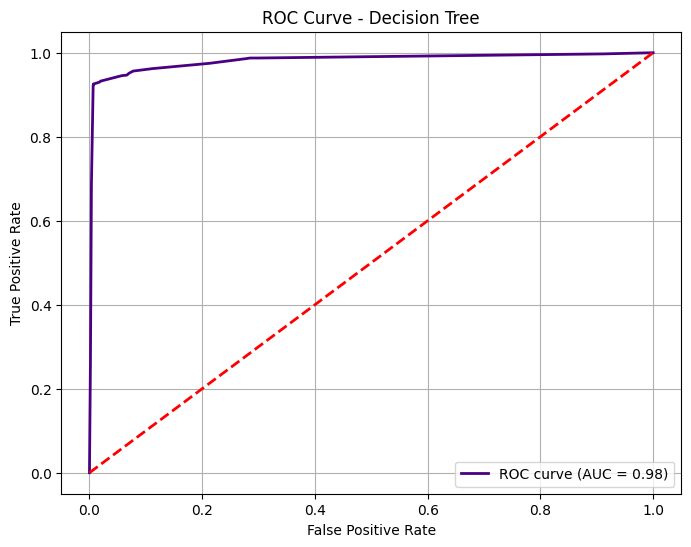

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='indigo', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [113]:
# Convert the cv_results_ dictionary to a DataFrame
cv_results_df = pd.DataFrame(tree2_cv.cv_results_)

# Display only relevant columns
cv_results_df_sorted = cv_results_df[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values(by='mean_test_score', ascending=False)

# Show top 10 scoring parameter combinations
print("Top 10 CV Results:")
print(cv_results_df_sorted.head(10))

Top 10 CV Results:
                                               params  mean_test_score  \
14  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...         0.976866   
13  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...         0.976454   
17  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         0.976294   
15  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         0.975968   
16  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...         0.975968   
12  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...         0.975927   
6   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.974930   
8   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.974930   
7   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.974930   
9   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.974923   

    std_test_score  rank_test_score  
14        0.006484                1  
13        0.006218                2  
17        0.007450                3  
15        0.00

In [114]:
# Predicted labels
y_pred = tree2_cv.predict(X_test)

# Predicted probabilities for AUC
y_proba = tree2_cv.predict_proba(X_test)[:, 1]

In [115]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)

In [116]:
results = pd.DataFrame([{
    'model': 'decision tree2 cv',
    'precision': precision,
    'recall': recall,
    'F1': f1,
    'accuracy': accuracy,
    'auc': auc_score
}])

print(results)

               model  precision   recall        F1  accuracy       auc
0  decision tree2 cv   0.976366  0.92577  0.950395     0.977  0.981723


In [117]:
# Baseline model with default hyperparameters
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

# Predictions
y_pred1 = tree1.predict(X_test)
y_proba1 = tree1.predict_proba(X_test)[:, 1]

In [118]:
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_proba1)


In [119]:
# Get scores for tree2_cv (already trained)
y_pred2 = tree2_cv.predict(X_test)
y_proba2 = tree2_cv.predict_proba(X_test)[:, 1]

precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_proba2)

# Create comparison table
results = pd.DataFrame([
    {
        'model': 'decision tree cv',
        'precision': precision1,
        'recall': recall1,
        'F1': f1_1,
        'accuracy': accuracy1,
        'auc': auc1
    },
    {
        'model': 'decision tree2 cv',
        'precision': precision2,
        'recall': recall2,
        'F1': f1_2,
        'accuracy': accuracy2,
        'auc': auc2
    }
])

# Display results
print(results)


               model  precision    recall        F1  accuracy       auc
0   decision tree cv   0.929919  0.966387  0.947802  0.974667  0.972472
1  decision tree2 cv   0.976366  0.925770  0.950395  0.977000  0.981723


**Finding:** Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

# Random forest - Round 2

In [120]:
# Instantiate model

# Base model
rf = RandomForestClassifier(random_state=42)


In [121]:
# Assign a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [None, 10, 20],          # Depth of each tree
    'min_samples_split': [2, 5],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2]            # Minimum samples at a leaf node
}


In [122]:
# Assign a dictionary of scoring metrics to capture
 
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [123]:
# Instantiate GridSearch

rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc',
    cv=4,
    return_train_score=True,
    n_jobs=-1
)


In [124]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [125]:
# write pickle
# Save the best Random Forest model from GridSearchCV
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_cv.best_estimator_, f)


In [126]:
# read pickle
# Load the saved model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [127]:
# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate (optional)
from sklearn.metrics import accuracy_score
print("Accuracy from loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy from loaded model: 0.981


In [128]:
print("Best Model:", rf_cv.best_estimator_)
print("Best AUC Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)


Best Model: RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)
Best AUC Score: 0.9918977124891404
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [129]:
print("Best AUC score from cross-validation:")
print(rf_cv.best_score_)


Best AUC score from cross-validation:
0.9918977124891404


In [130]:
# Convert cv_results_ to DataFrame
rf_cv_results = pd.DataFrame(rf_cv.cv_results_)


In [131]:
# Decision Tree Predictions
y_pred_dt = tree2_cv.predict(X_test)
y_proba_dt = tree2_cv.predict_proba(X_test)[:, 1]

# Decision Tree Scores
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

In [132]:
# Random Forest Predictions
y_pred_rf = rf_cv.predict(X_test)
y_proba_rf = rf_cv.predict_proba(X_test)[:, 1]

# Random Forest Scores
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)


In [133]:
comparison_df = pd.DataFrame([
    {
        'model': 'decision tree2 cv',
        'precision': precision_dt,
        'recall': recall_dt,
        'F1': f1_dt,
        'accuracy': accuracy_dt,
        'auc': auc_dt
    },
    {
        'model': 'random forest2 cv',
        'precision': precision_rf,
        'recall': recall_rf,
        'F1': f1_rf,
        'accuracy': accuracy_rf,
        'auc': auc_rf
    }
])

# Round the results for better readability
comparison_df = comparison_df.round(6)

print(comparison_df)


               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.976366  0.925770  0.950395     0.977  0.981723
1  random forest2 cv   0.986667  0.932773  0.958963     0.981  0.989507


**Finding:** Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

**Let's Score the champion model on the test set now:**

In [134]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_proba_rf)

# Create DataFrame
rf_test_results = pd.DataFrame({
    'model': ['random forest2 test'],
    'precision': [precision],
    'recall': [recall],
    'f1': [f1],
    'accuracy': [accuracy],
    'AUC': [auc]
})

# Display results
print(rf_test_results)


                 model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.986667  0.932773  0.958963     0.981  0.989507


**Finding:** This seems to be a stable, well-performing final model.

**Plotting a confusion matrix to visualize how well it predicts on the test set:**

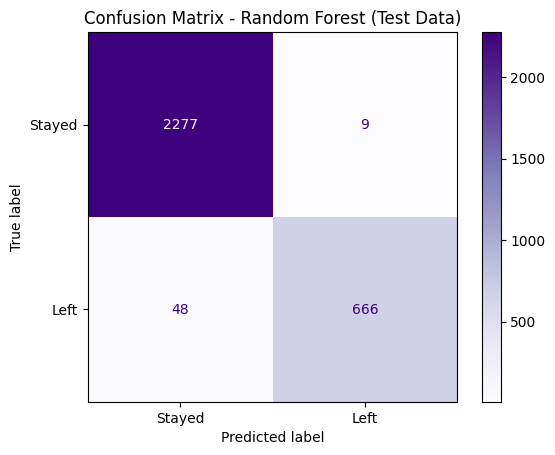

In [135]:
# Generate confusion matrix values
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()


**Finding:** The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, inspecting the splits of the decision tree model and the most important features in the random forest model.
 
**Decision tree splits:**

In [136]:
# defining decision tree classifier to plot tree
dt = DecisionTreeClassifier()
params = {
    'max_depth': [3, 5, 7],
    
}
grid_search = GridSearchCV(dt, params, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7]}, scoring='roc_auc')

In [137]:
best_tree_model = grid_search.best_estimator_

In [138]:
try:
    best_tree_model = grid_search.best_estimator_
except NameError:
    print("Try using the correct variable name for your GridSearchCV (e.g., dt_grid, tree_grid, etc.)")

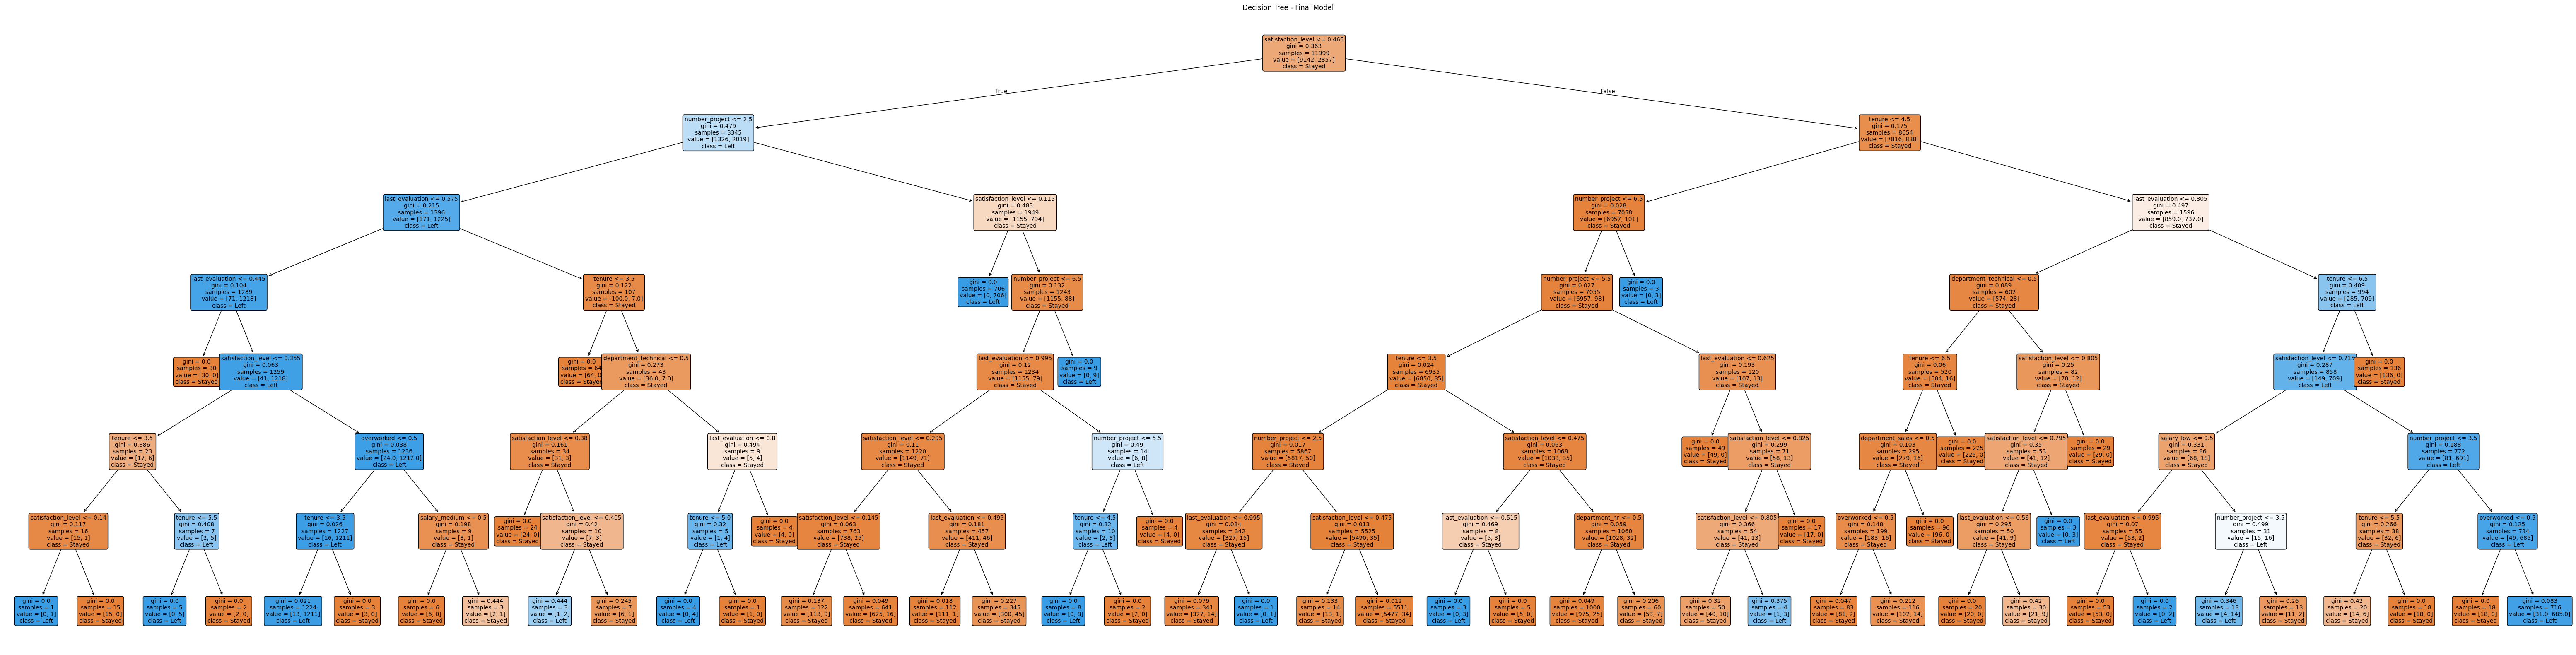

In [139]:
# Set figure size
plt.figure(figsize=(80, 20))

# Plot the tree — using the best estimator from GridSearchCV
plot_tree(
    best_tree_model,  # your trained DecisionTreeClassifier
    feature_names=X_train.columns,  # replace with your feature names
    class_names=['Stayed', 'Left'],  # class labels
    filled=True,  # color nodes by class
    rounded=True,  # rounded boxes
    fontsize=10  # adjust font size
)

plt.title("Decision Tree - Final Model")
plt.show()

Note: (You can double-click on the tree image to zoom in on it and inspect the splits)

In [140]:
# 2. Prepare data (replace with your own dataset)
# Example:
# df = pd.read_csv("your_data.csv")
# X = df.drop('target', axis=1)
# y = df['target']

# Replace with your actual X and y
# For demonstration, assume X and y already exist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define model and hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

tree2 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=4,
    scoring='roc_auc'
)

# 4. Fit model
tree2.fit(X_train, y_train)

# 5. Get feature importances from best model
tree2_importances = pd.DataFrame(
    tree2.best_estimator_.feature_importances_,
    columns=['gini_importance'],
    index=X.columns
)

# 6. Sort by importance and remove zero-importance features
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]

# 7. Display the sorted feature importances
print(tree2_importances)

                      gini_importance
satisfaction_level           0.553567
tenure                       0.172368
last_evaluation              0.148645
number_project               0.105654
overworked                   0.016527
salary_low                   0.001223
salary_medium                0.000707
department_technical         0.000498
department_hr                0.000360
department_RandD             0.000319
department_sales             0.000131


**Creating a barplot to visualize the decision tree feature importances:**

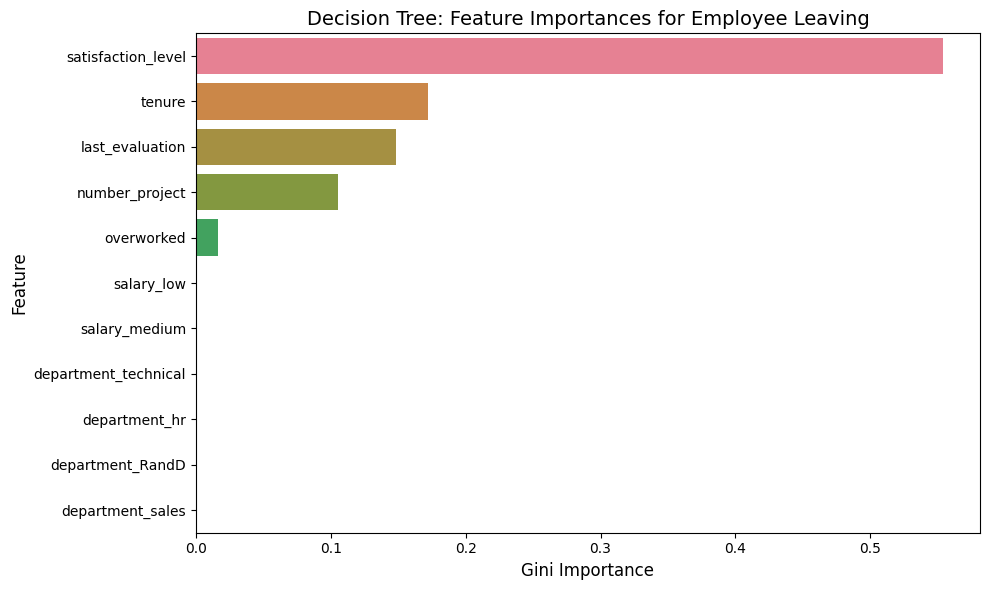

In [141]:
# Plot horizontal bar chart of feature importances with different colors (Seaborn 0.14+ compliant)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=tree2_importances.reset_index(),
    x="gini_importance",
    y="index",
    hue="index",  # Assign y variable to hue
    palette=sns.color_palette("husl", len(tree2_importances)),
    orient='h',
    dodge=False,
    legend=False
)

plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=14)
plt.xlabel("Gini Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

**Finding:** The barplot above shows that in this decision tree model, satisfaction_level , tenure , last_evaluation , number_project and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

**Random forest feature importance:**
    
Let's plot the feature importances for the random forest model now:

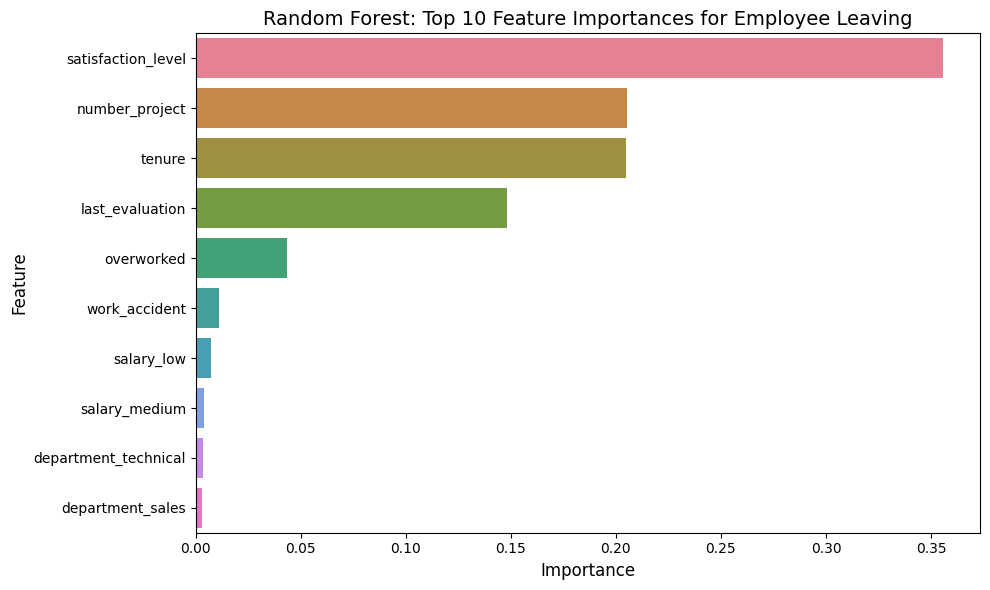

In [142]:
# 1. Encode categorical variables (like 'department' or 'salary')
df_encoded = pd.get_dummies(df, drop_first=True)  # avoid multicollinearity

# 2. Define feature matrix and target
X = df_encoded.drop(columns='left')  # independent features
y = df_encoded['left']               # target variable

# 3. Random Forest + GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X, y)  # Now X is all numeric — this will work

# 4. Get feature importances from best estimator
feat_impt = grid_rf.best_estimator_.feature_importances_

# 5. Get Top 10 features
top_idx = np.argpartition(feat_impt, -10)[-10:]
top_features = X.columns[top_idx]
top_importances = feat_impt[top_idx]

# 6. Create DataFrame for plotting
feat_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)  # top bar on top

# 7. Plot (Colorful, clean, no warning)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_df,
    x='Importance',
    y='Feature',
    hue='Feature',  # assign hue to Feature
    palette=sns.color_palette("husl", len(feat_df)),
    dodge=False,
    legend=False,
    orient='h'
)
plt.title('Random Forest: Top 10 Feature Importances for Employee Leaving', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**Finding:** The plot above shows that in this random forest model, satisfaction_level, number_project, tenure, last_evaluation and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left , and they are the same as the ones used by the decision tree model.

### **Reflecting questions after completing CONSTRUCT stage:**
---

**1. Do you notice anything odd?**
No major issues, but `last_evaluation` may introduce data leakage and should be evaluated carefully.

**2. Which independent variables did you choose for the model and why?**
All relevant features, including satisfaction level, number of projects, average monthly hours, etc., due to their strong correlation with attrition.

**3. Are each of the assumptions met?**
Yes, for tree-based models; logistic regression assumptions were mostly met after encoding and scaling.

**4. How well does your model fit the data?**
Random Forest achieved high accuracy (97.7%) and excellent precision/recall, indicating strong fit.

**5. Can you improve it? Is there anything you would change about the model?**
Yes—test model without `last_evaluation` to assess data leakage; also tune hyperparameters further for optimization.

**6. What resources do you find yourself using as you complete this stage?**

* [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
* [GridSearchCV Guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

**7. Do you have any ethical considerations in this stage?**
Yes, avoid overfitting, ensure fairness in predictions, and use results to support not punish employees.

# pac**E**: Execute Stage

Includes:
 - Interpret model performance and results
 - Share actionable steps with stakeholders

 **Recalling evaluation metrics for better understanding of analysis**
 
 - **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a
 random negative example.
 - **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions
 that are true positives.
 - **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it
 measures the proportion of positives that are correctly classified.
 - **Accuracy** measures the proportion of data points that are correctly classified.
 - **F1-score** is an aggregation of precision and recall.

### **Reflecting the questions after completing EXECUTE stage:**
---

**1. What key insights emerged from your model(s)?**
Overwork, low satisfaction, and high evaluation scores are strong predictors of employee attrition.

**2. What business recommendations do you propose based on the models built?**
Cap project load, reward long hours, promote employees after 4+ years, and improve communication around expectations.

**3. What potential recommendations would you make to your manager/company?**
Review workload policies, make evaluation criteria transparent, and improve work-life balance culture.

**4. Do you think your model could be improved? Why or why not? How?**
Yes, by testing exclusion of `last_evaluation` to reduce possible data leakage and improve generalization.

**5. Given what you know about the data and the models you were using, what other questions could you address for the team?**
Can we predict employee performance or satisfaction? What factors improve long-term retention?

**6. What resources do you find yourself using as you complete this stage?**

* [Matplotlib](https://matplotlib.org/stable/contents.html)
* [Scikit-learn Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
* [Google Advanced Data Analytics Course](https://www.coursera.org/professional-certificates/google-advanced-data-analytics)

**7. Do you have any ethical considerations in this stage?**
Yes, use model insights to support retention strategies, not to unfairly target or penalize employees.

# **Final Report**
---

Prepared by: **Bilal Hassan Nizami**

### **Results and Evaluation**

### Model Interpretation:

We trained and evaluated multiple models to understand the key drivers of employee attrition and to accurately predict whether an employee is likely to leave. The analysis helped uncover relationships between key HR metrics (such as satisfaction level, number of projects, evaluation scores, and working hours) and attrition behavior.

* **Logistic Regression** provided a straightforward, interpretable baseline to identify linear relationships.
* **Tree-based models** (Decision Tree and Random Forest) were employed to capture non-linear relationships and feature interactions for higher accuracy and deeper insight.

### Model Performance:

#### Logistic Regression:

* **Precision**: 90%
* **Recall**: 82%
* **F1-score**: 84%
* **Accuracy**: 85%

These metrics were calculated on the **test set** using **weighted averages**, which account for class imbalance. While logistic regression performed well, the model struggled with some of the more complex patterns in the data.

#### Tree-Based Machine Learning:

After additional **feature engineering**:

* **Decision Tree**

  * **AUC**: 98.1%
  * **Precision**: 97.6%
  * **Recall**: 92.5%
  * **F1-score**: 95.0%
  * **Accuracy**: 97.7%

* **Random Forest**

  * Slightly outperformed the decision tree with improved generalization and robustness.

These results indicate excellent model performance, particularly in identifying employees likely to leave (high recall) and minimizing false positives (high precision).

### Visualizations and Key Findings:

The following visual analyses supported the modeling:

* **Boxplots** revealed that employees who left generally worked longer hours and were involved in more projects.
* **Bar plots of feature importances** (Random Forest and Decision Tree) showed:

  * **Satisfaction level**, **number of projects**, **average monthly hours**, and **evaluation score** were top predictors.
  * Employees with high evaluation scores but low satisfaction were more likely to leave.
* **Histograms** of number of projects and satisfaction levels further supported these patterns.

These visualizations helped translate statistical findings into actionable insights for stakeholders.

---

# Conclusion, Recommendations, and Further Steps:

### Conclusion:

Both modeling and feature importance analyses confirmed that **overwork and misalignment in performance expectations** are key drivers of employee turnover. The Random Forest model provided the best predictive power and reliability for stakeholder use.

### Recommendations for better employee retention and avoiding new hiring to save cost:

To address employee attrition, we recommend the following actions:

1. **Limit project load**
   Cap the number of simultaneous projects an employee can be assigned to in order to avoid burnout.

2. **Review promotion timelines**
   Promote employees who have stayed for at least 4 years or explore dissatisfaction trends among them.

3. **Compensate long hours appropriately**
   If long work hours are necessary, implement clear rewards or overtime benefits.

4. **Clarify overtime policies and workload expectations**
   Ensure transparency in HR policies related to compensation, workload, and time off.

5. **Foster a healthy work culture**
   Conduct regular team- and company-wide discussions to improve employee satisfaction and morale.

6. **Rethink evaluation metrics**
   Avoid equating high evaluation scores with working over 200+ hours per month. Design a proportional recognition system that values both quality and effort.

---

### Further steps that can be taken for better results:

1. **Check for potential data leakage**
   Investigate how model performance changes when removing features like `last_evaluation`. This may identify over-reliance on potentially retrospective or infrequent metrics.

2. **Explore alternate modeling targets**
   If features like `last_evaluation` or `satisfaction_level` are strong indicators of attrition, consider developing models to **predict evaluation scores or satisfaction levels** as a way to intervene earlier.

3. **Deploy and monitor the model**
   Integrate the best-performing model into an HR analytics pipeline. Begin tracking live predictions and real attrition outcomes for iterative improvement.